# H1C IDR3.2 JD and Triad Metrics

In [4]:
import os
import h5py
import numpy as np
from itertools import product

import sys
sys.path.append("/users/pkeller/code/H1C_IDR3.2/")

from closurelib import cptools as cp
from closurelib import plot

from ipywidgets import interact

import matplotlib.pyplot as plt

## Load Data

In [5]:
# data directory
ddir = "/lustre/aoc/projects/hera/pkeller/data/H1C_IDR3.2/sample/"

# triad names
trnames = ["EQ14", "EQ28"]

# field names
fnames = ["A", "B", "C", "D", "E"]

data = dict()

for trname, fname in product(trnames, fnames):
    name = f"{trname}_F{fname}"
    path = os.path.join(ddir, f"{name}_B2.h5")
    data.update({name: dict()})
        
    with h5py.File(path, "r") as f:
        data[name].update({"JD": f["JD"][()]})
        data[name].update({"triads": f["triads"][()]})
        data[name].update({"metric": f["triad-JD metric"][()]})

flags = dict()

In [6]:
triads = []
jd = []

for name in list(data.keys()):
    triads.extend(data[name]["triads"].tolist())
    jd.extend(data[name]["JD"].tolist())

# unique list of triads and JD
triads = np.unique(triads, axis=0)
jd = np.unique(jd)

## Average Metrics

In [7]:
metric = np.zeros((2, len(jd), len(triads)))
metric_list = []

for name in list(data.keys()):
    metric = np.zeros((2, len(jd), len(triads)))
    jdidx = np.array([data[name]["JD"][i] == jd for i in range(len(data[name]["JD"]))])
    tridx = np.array([(data[name]["triads"][i] == triads).all(-1) for i in range(len(data[name]["triads"]))])
    jdidx = np.where(jdidx)[1]
    tridx = np.where(tridx)[1]
    metric[0][np.ix_(jdidx, tridx)] = data[name]["metric"][0]
    metric[1][np.ix_(jdidx, tridx)] = data[name]["metric"][1]
    metric[np.where(metric == 0)] = np.nan
    metric_list.append(metric)

metric = np.nanmean(metric_list, axis=0)

/lustre/aoc/projects/hera/pkeller/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


## Plot Metrics

In [8]:
def triad_jd_metric(data):
    plot.triad_jd_metric(data["metric"], data["triads"], data["JD"])

/lustre/aoc/projects/hera/pkeller/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


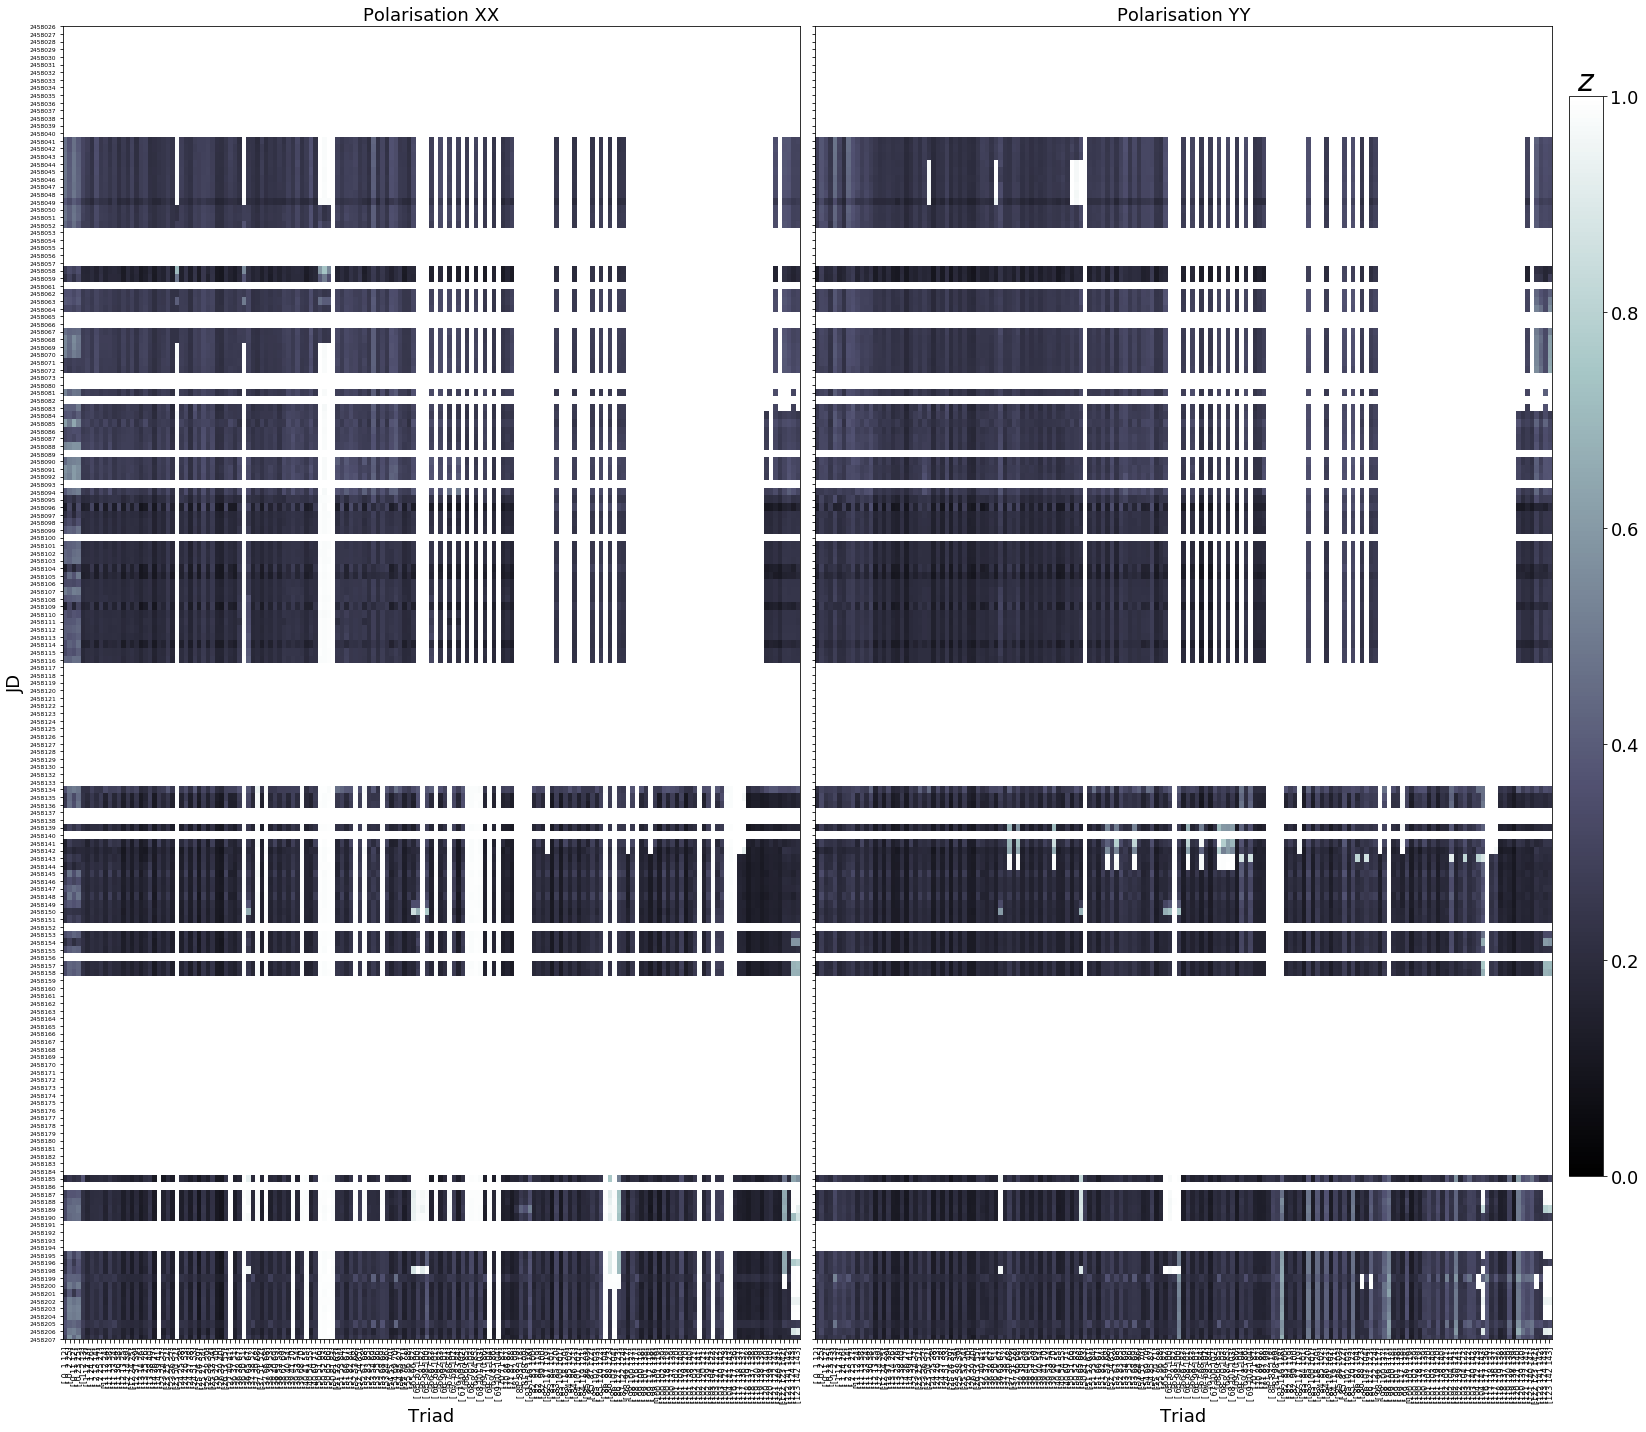

In [9]:
ax = plot.triad_jd_metric(metric, triads, jd);

## Plot Flags

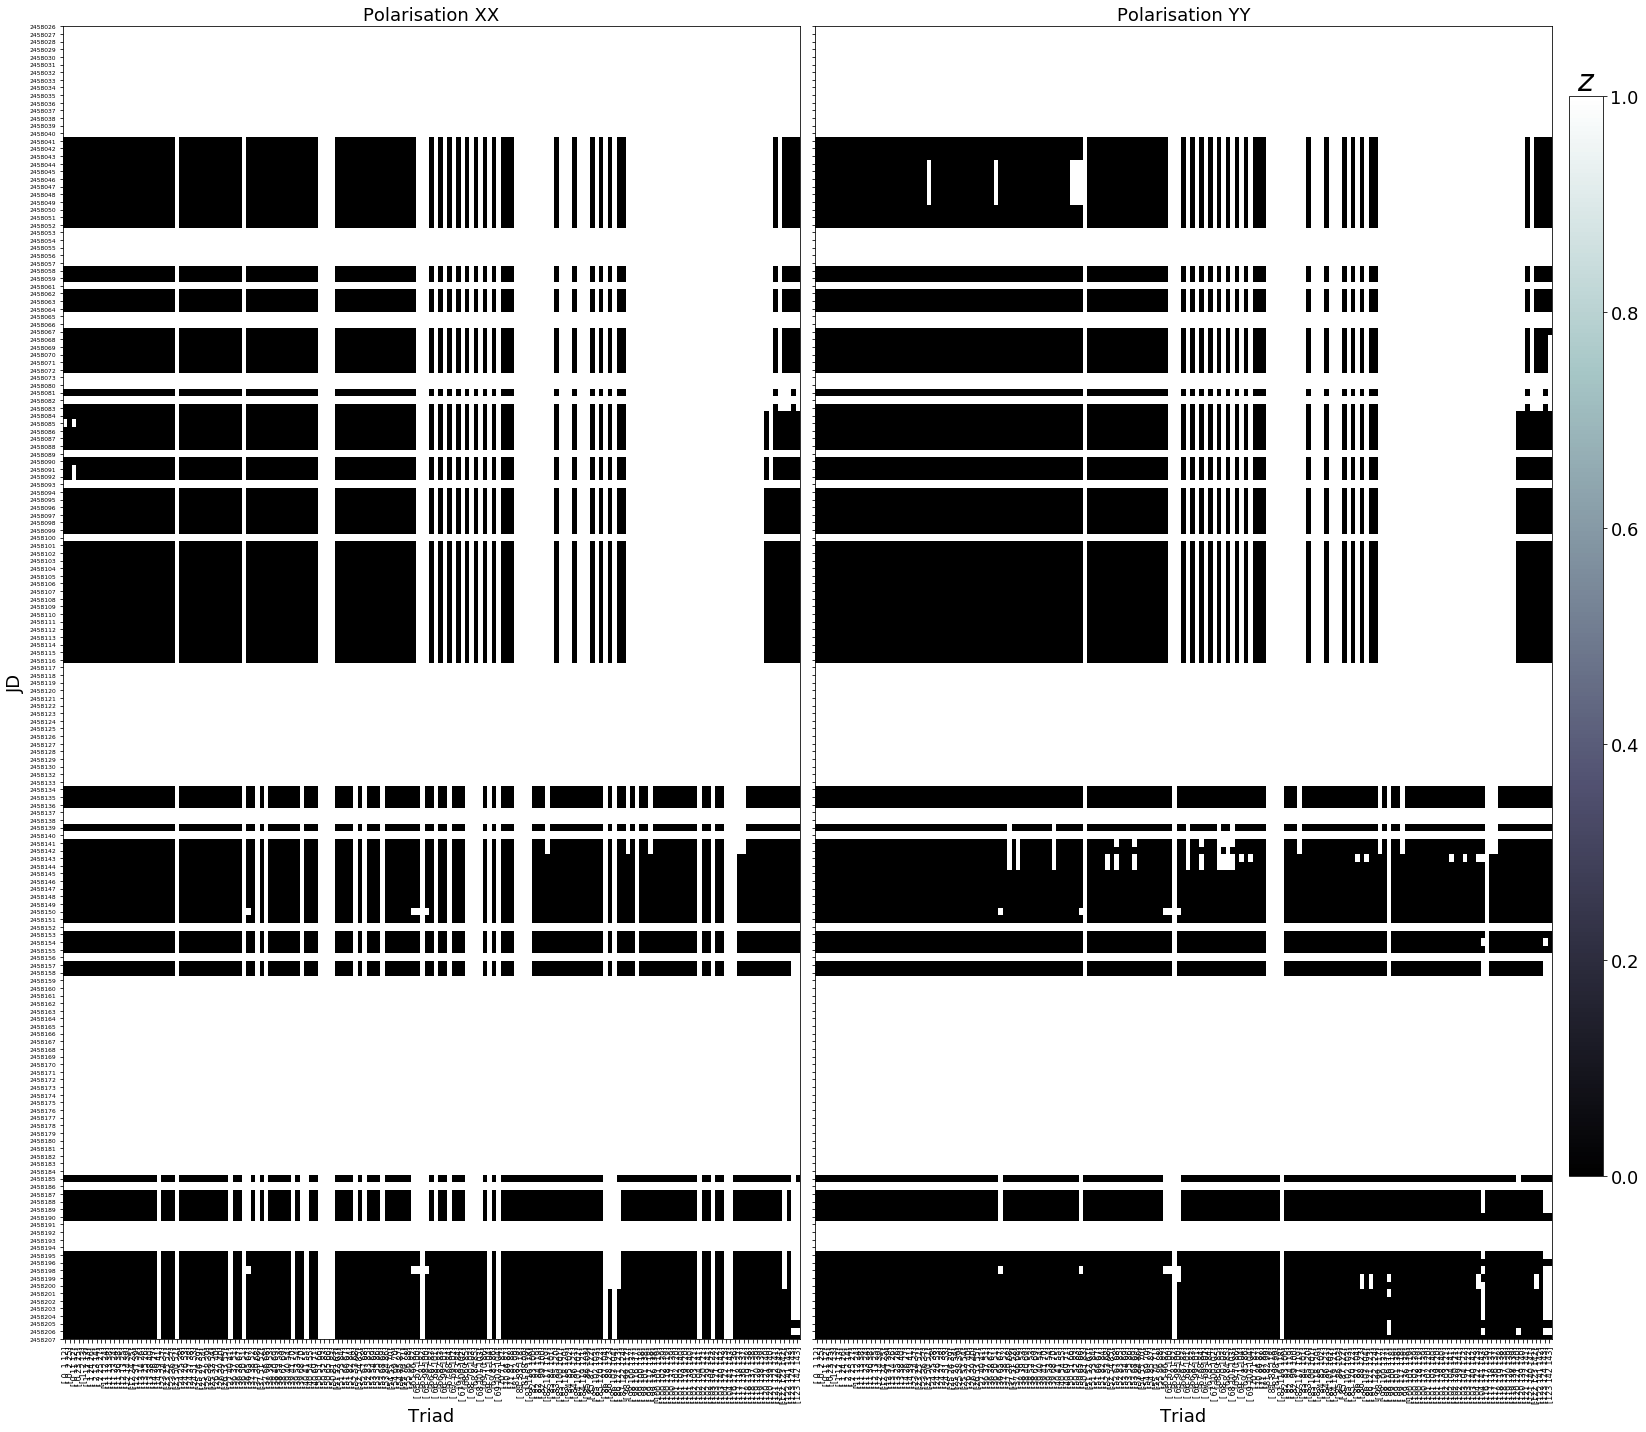

In [10]:
flags = np.zeros_like(metric).astype(bool)
flags[np.where(metric > 0.6)] = True
flags[np.isnan(metric)] = True
badpol, badtr = np.where(np.sum(~flags, axis=1) < 12)
flags[badpol, :, badtr] = True
plot.triad_jd_metric(flags, triads, jd);

## Make Flags for each Field

In [11]:
for trname, fname in product(trnames, fnames):
    name = f"{trname}_F{fname}"
    tridx = np.array([(triad == data[name]["triads"]).all(-1).any() for triad in triads])
    jdidx = np.in1d(jd, data[name]["JD"])
    data[name].update({"Flags": np.flip(flags[:, jdidx][..., tridx], axis=1)})

### Field A EQ14

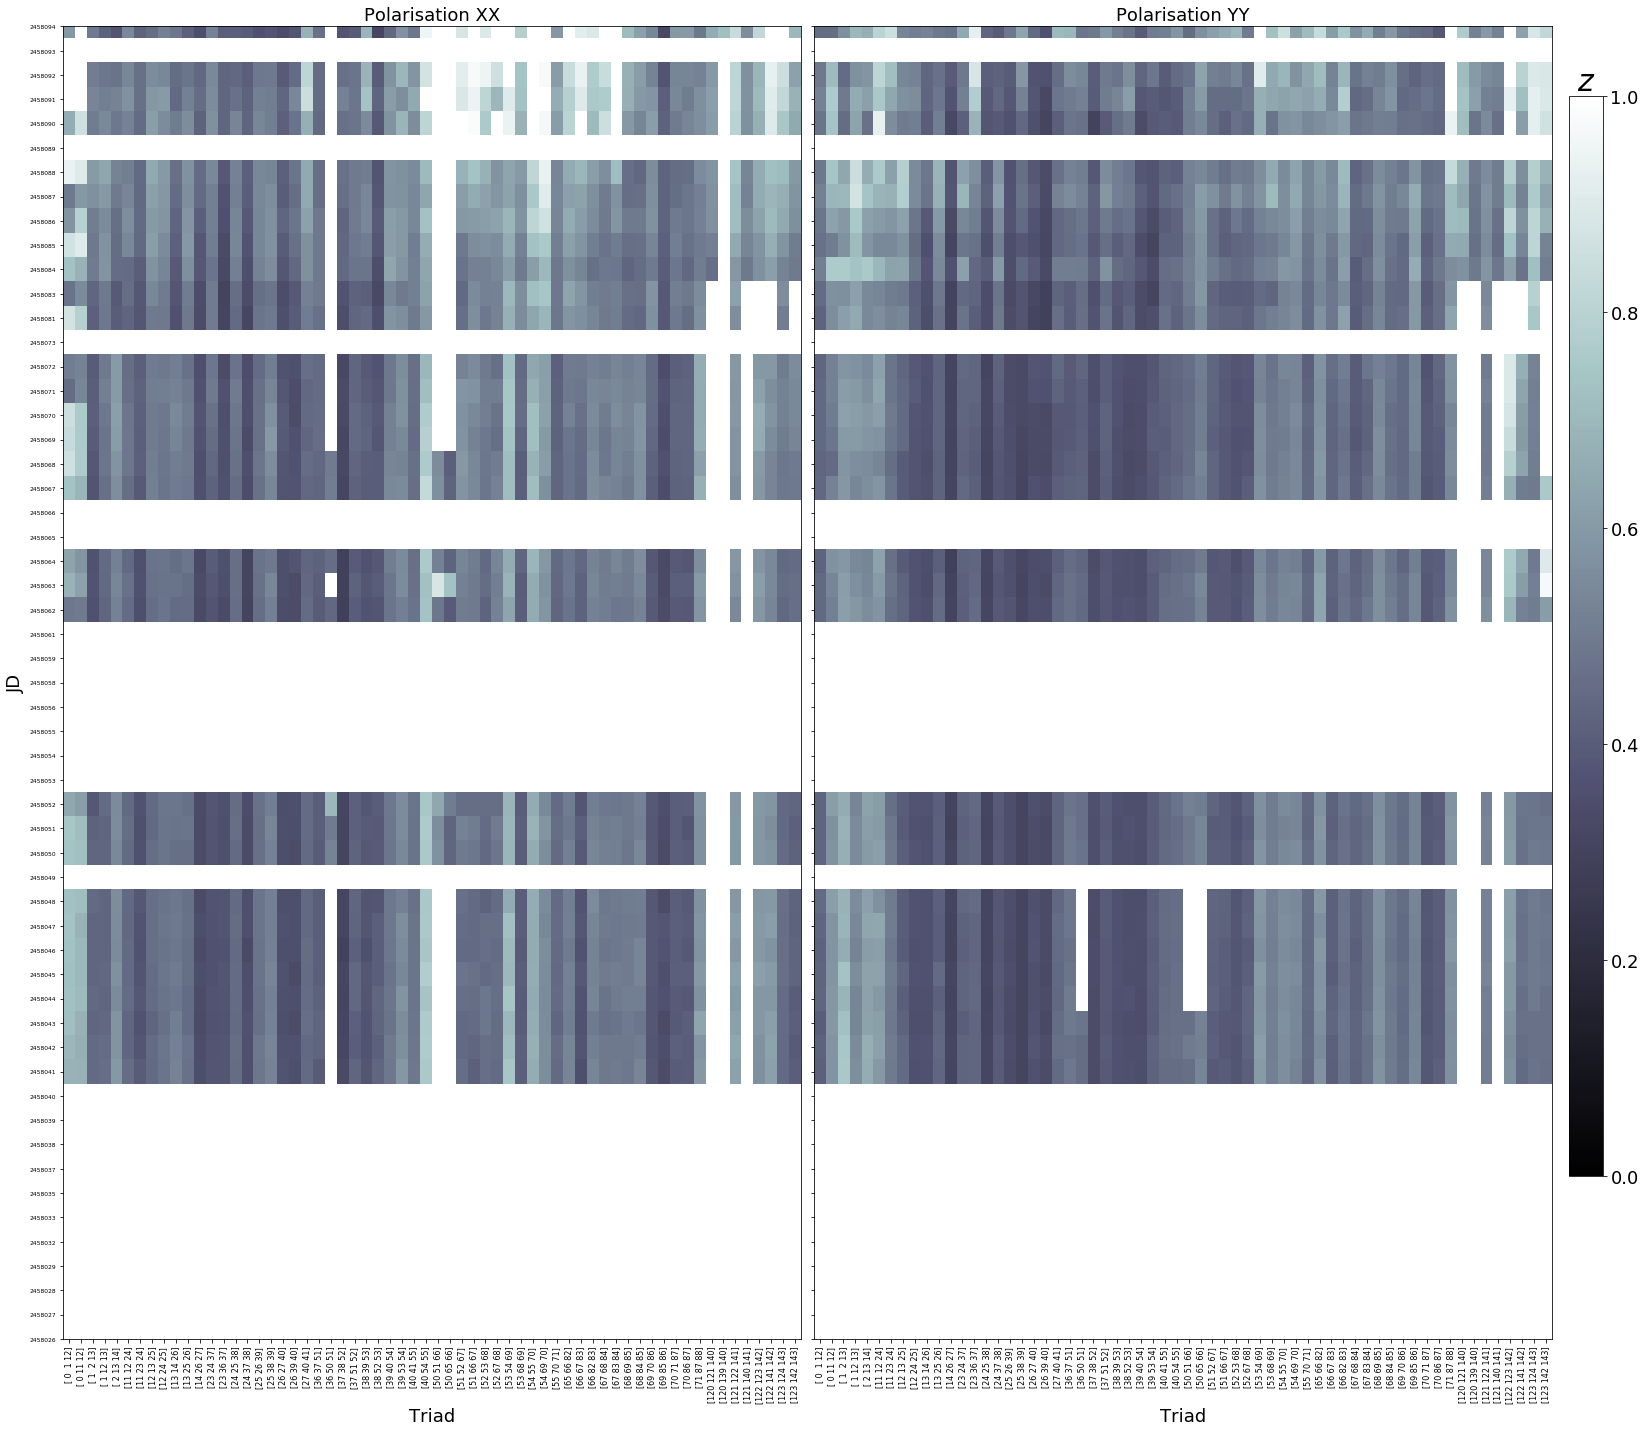

In [12]:
triad_jd_metric(data["EQ14_FA"])

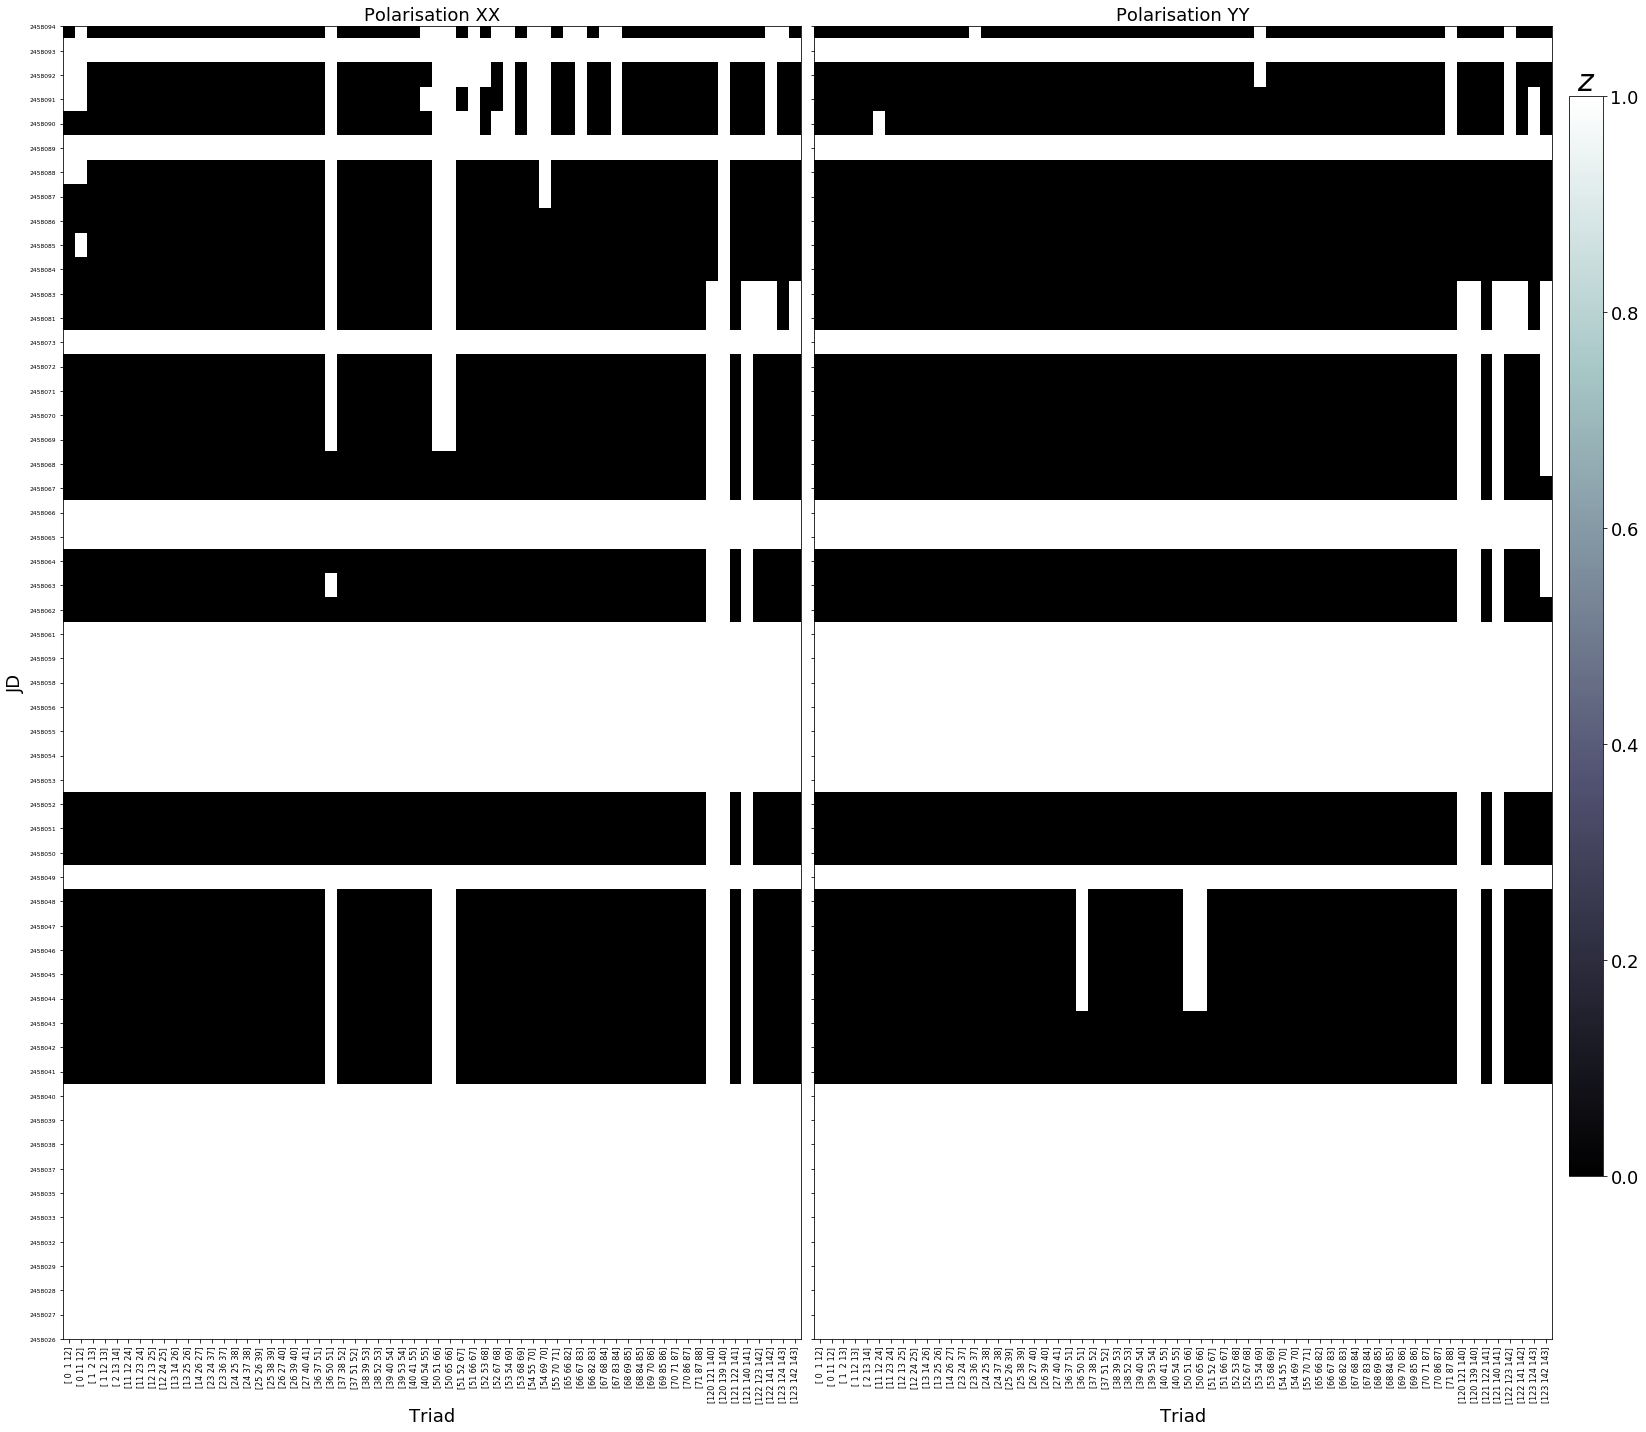

In [14]:
name = "EQ14_FA"
flags = dict()
fl = np.zeros_like(data[name]["metric"]).astype(bool)
fl[np.where(data[name]["metric"] > 0.9)] = True
fl[np.isnan(data[name]["metric"])] = True
flags.update({name: fl})
trlist, jd = data[name]["triads"], data[name]["JD"]
plot.triad_jd_metric(fl, trlist, jd);

### Field A EQ28

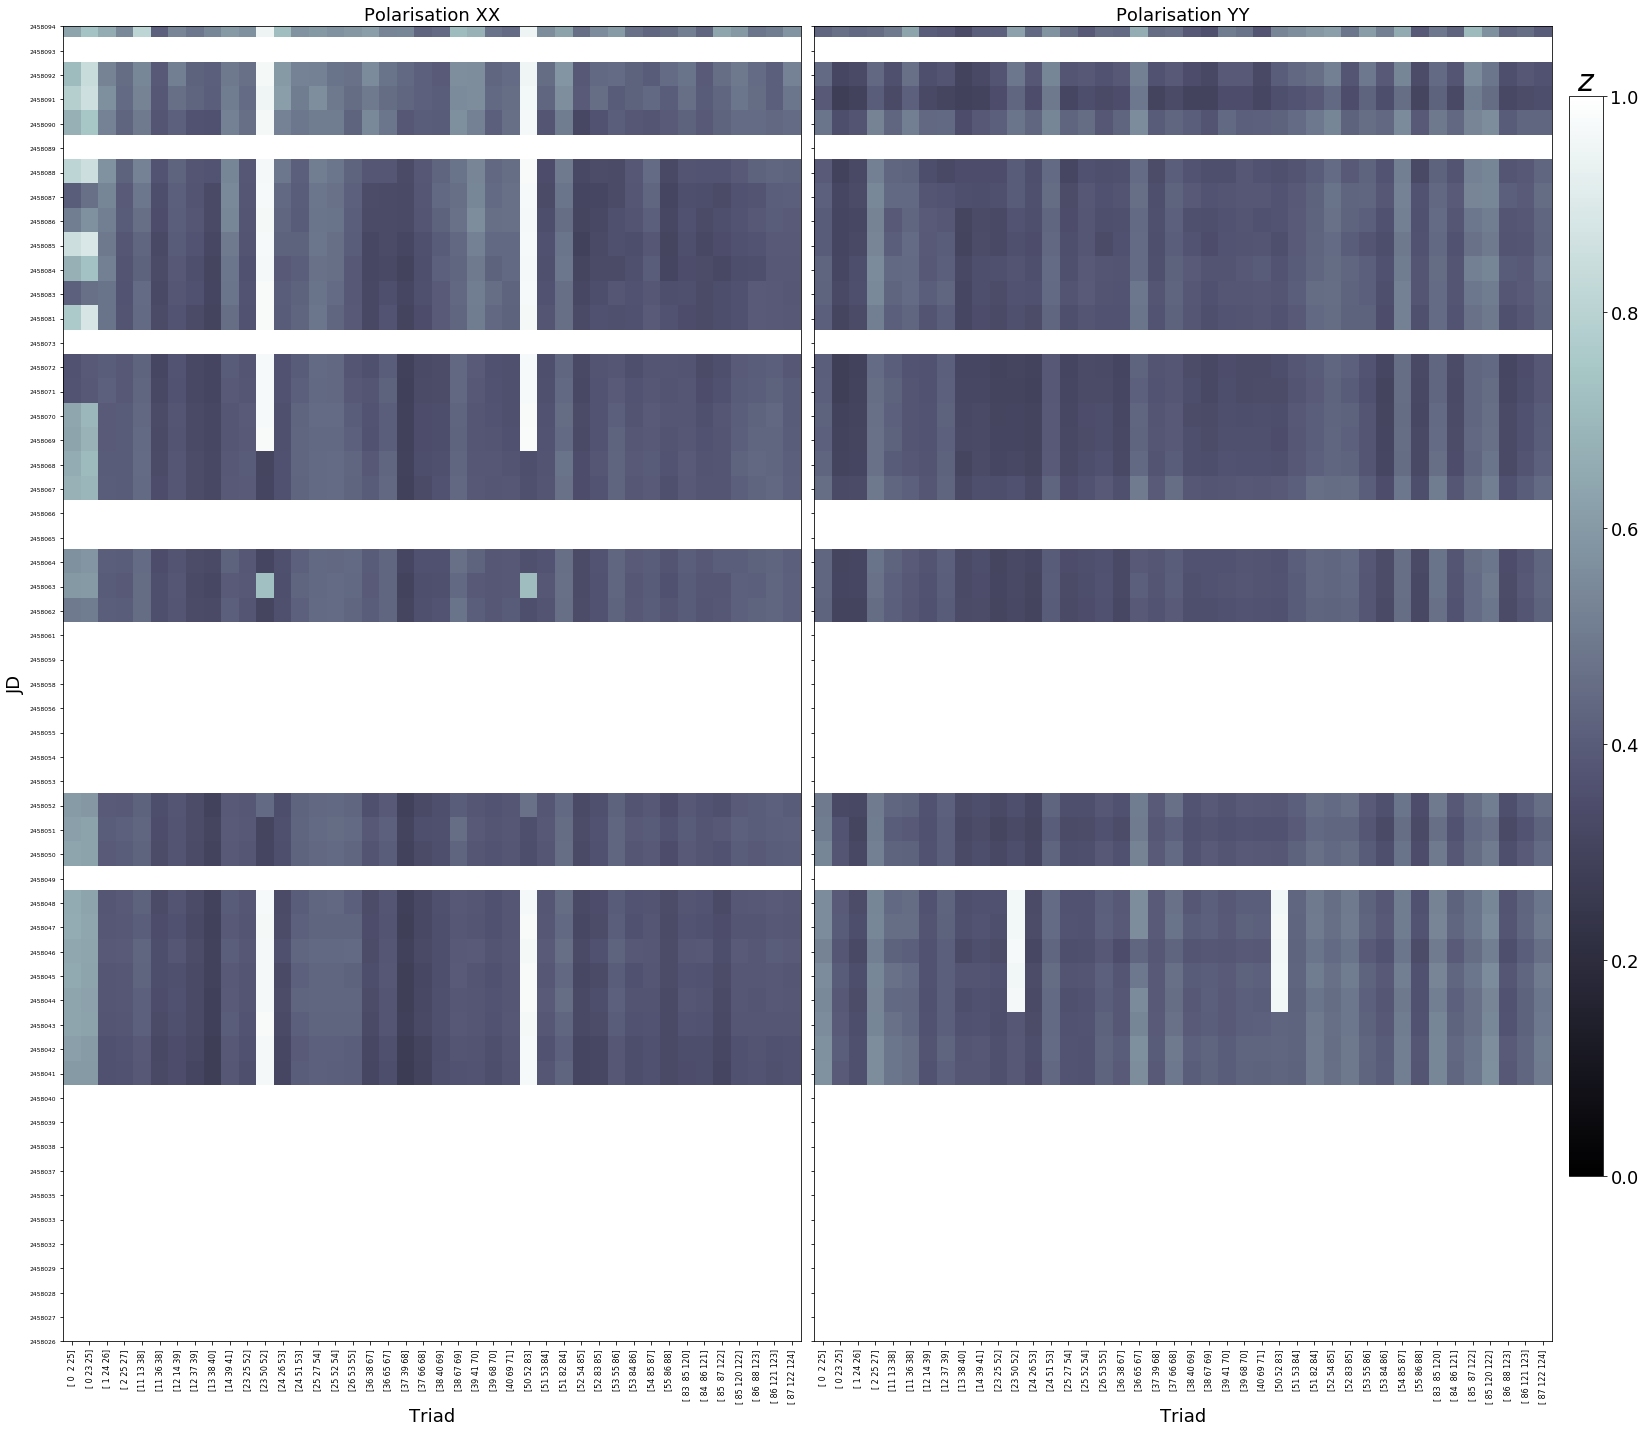

In [15]:
triad_jd_metric(data["EQ28_FA"])

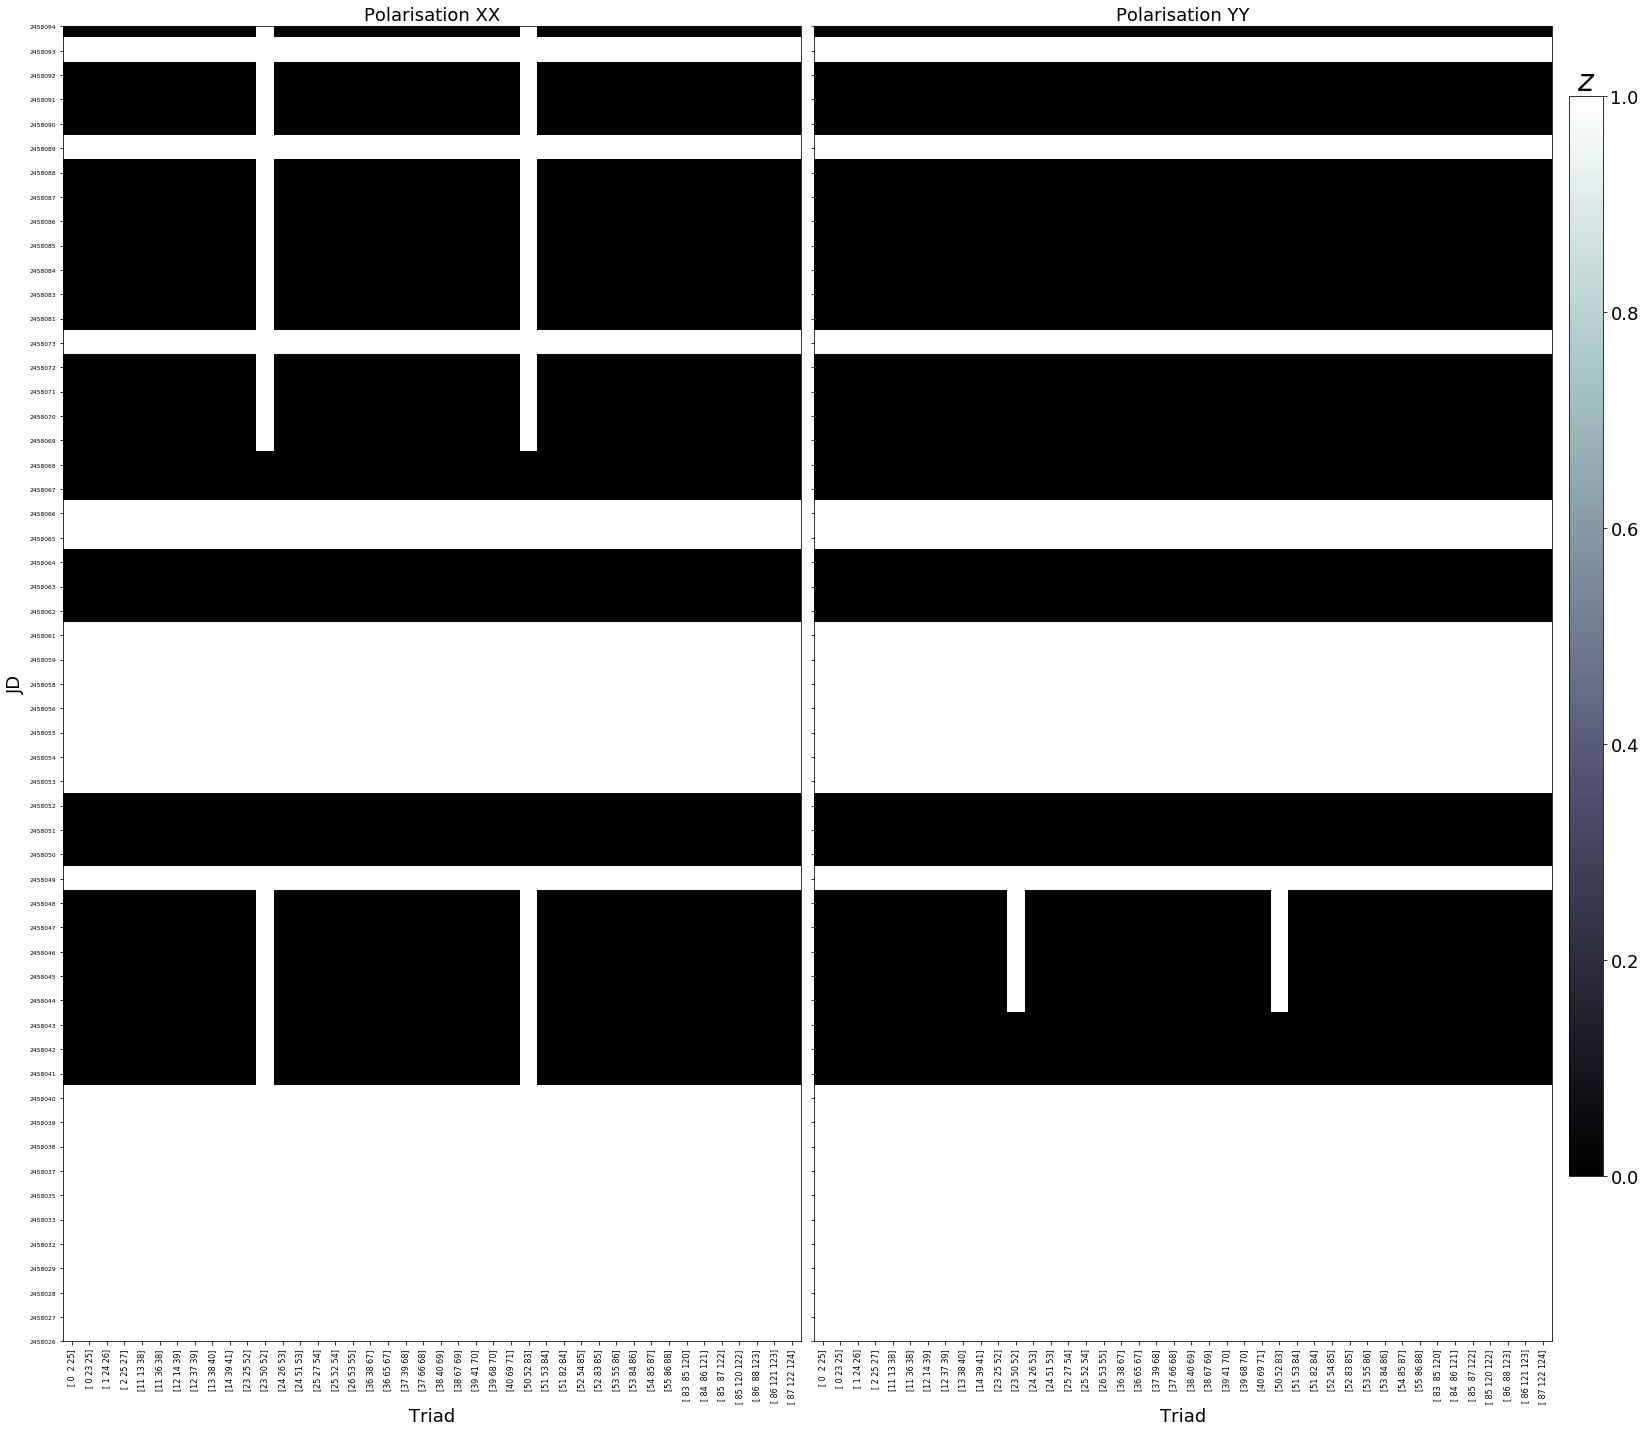

In [16]:
name = "EQ28_FA"
fl = np.zeros_like(data[name]["metric"]).astype(bool)
fl[np.where(data[name]["metric"] > 0.9)] = True
fl[np.isnan(data[name]["metric"])] = True
flags.update({name: fl})
trlist, jd = data[name]["triads"], data[name]["JD"]
plot.triad_jd_metric(fl, trlist, jd);

### Field B EQ14

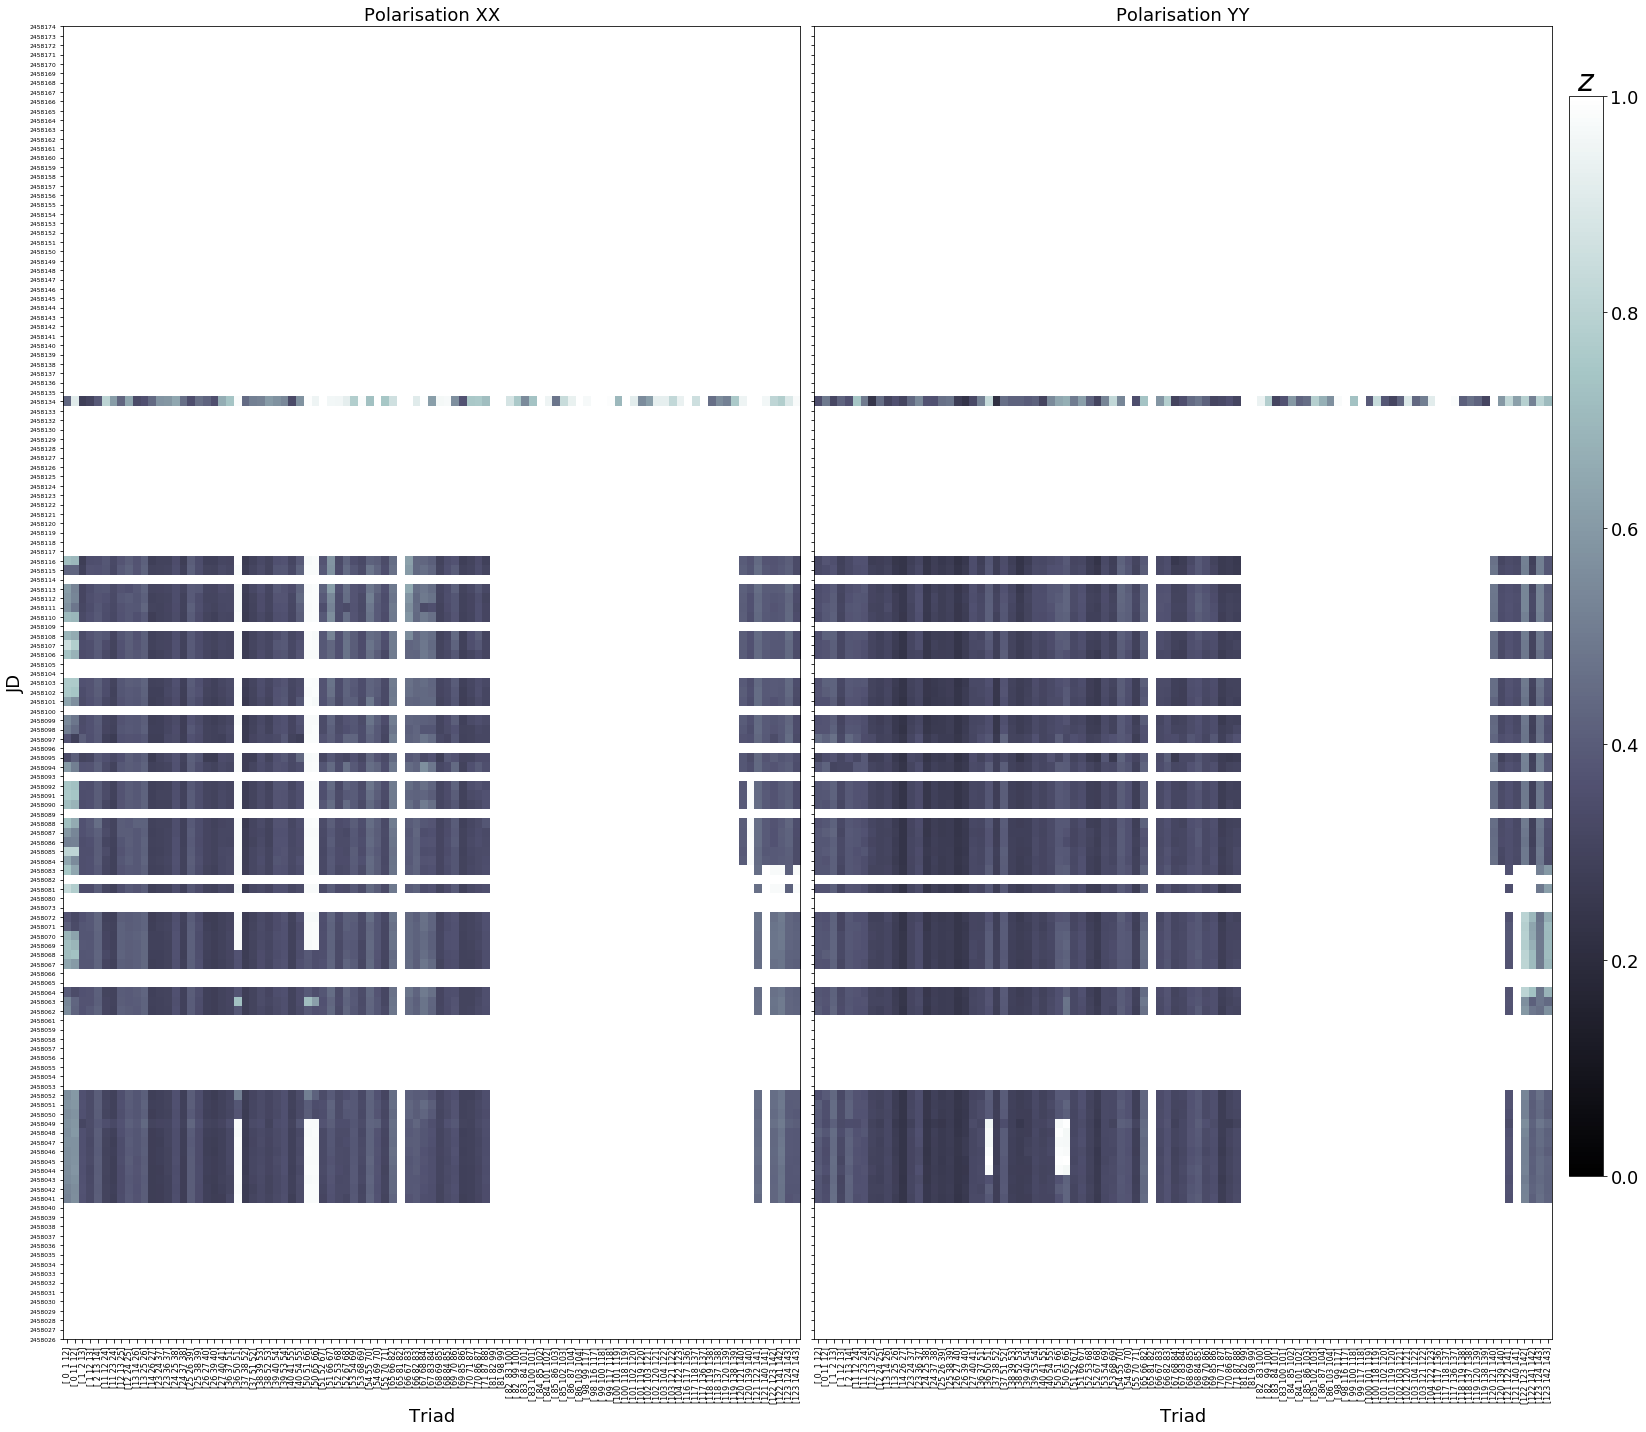

In [17]:
triad_jd_metric(data["EQ14_FB"])

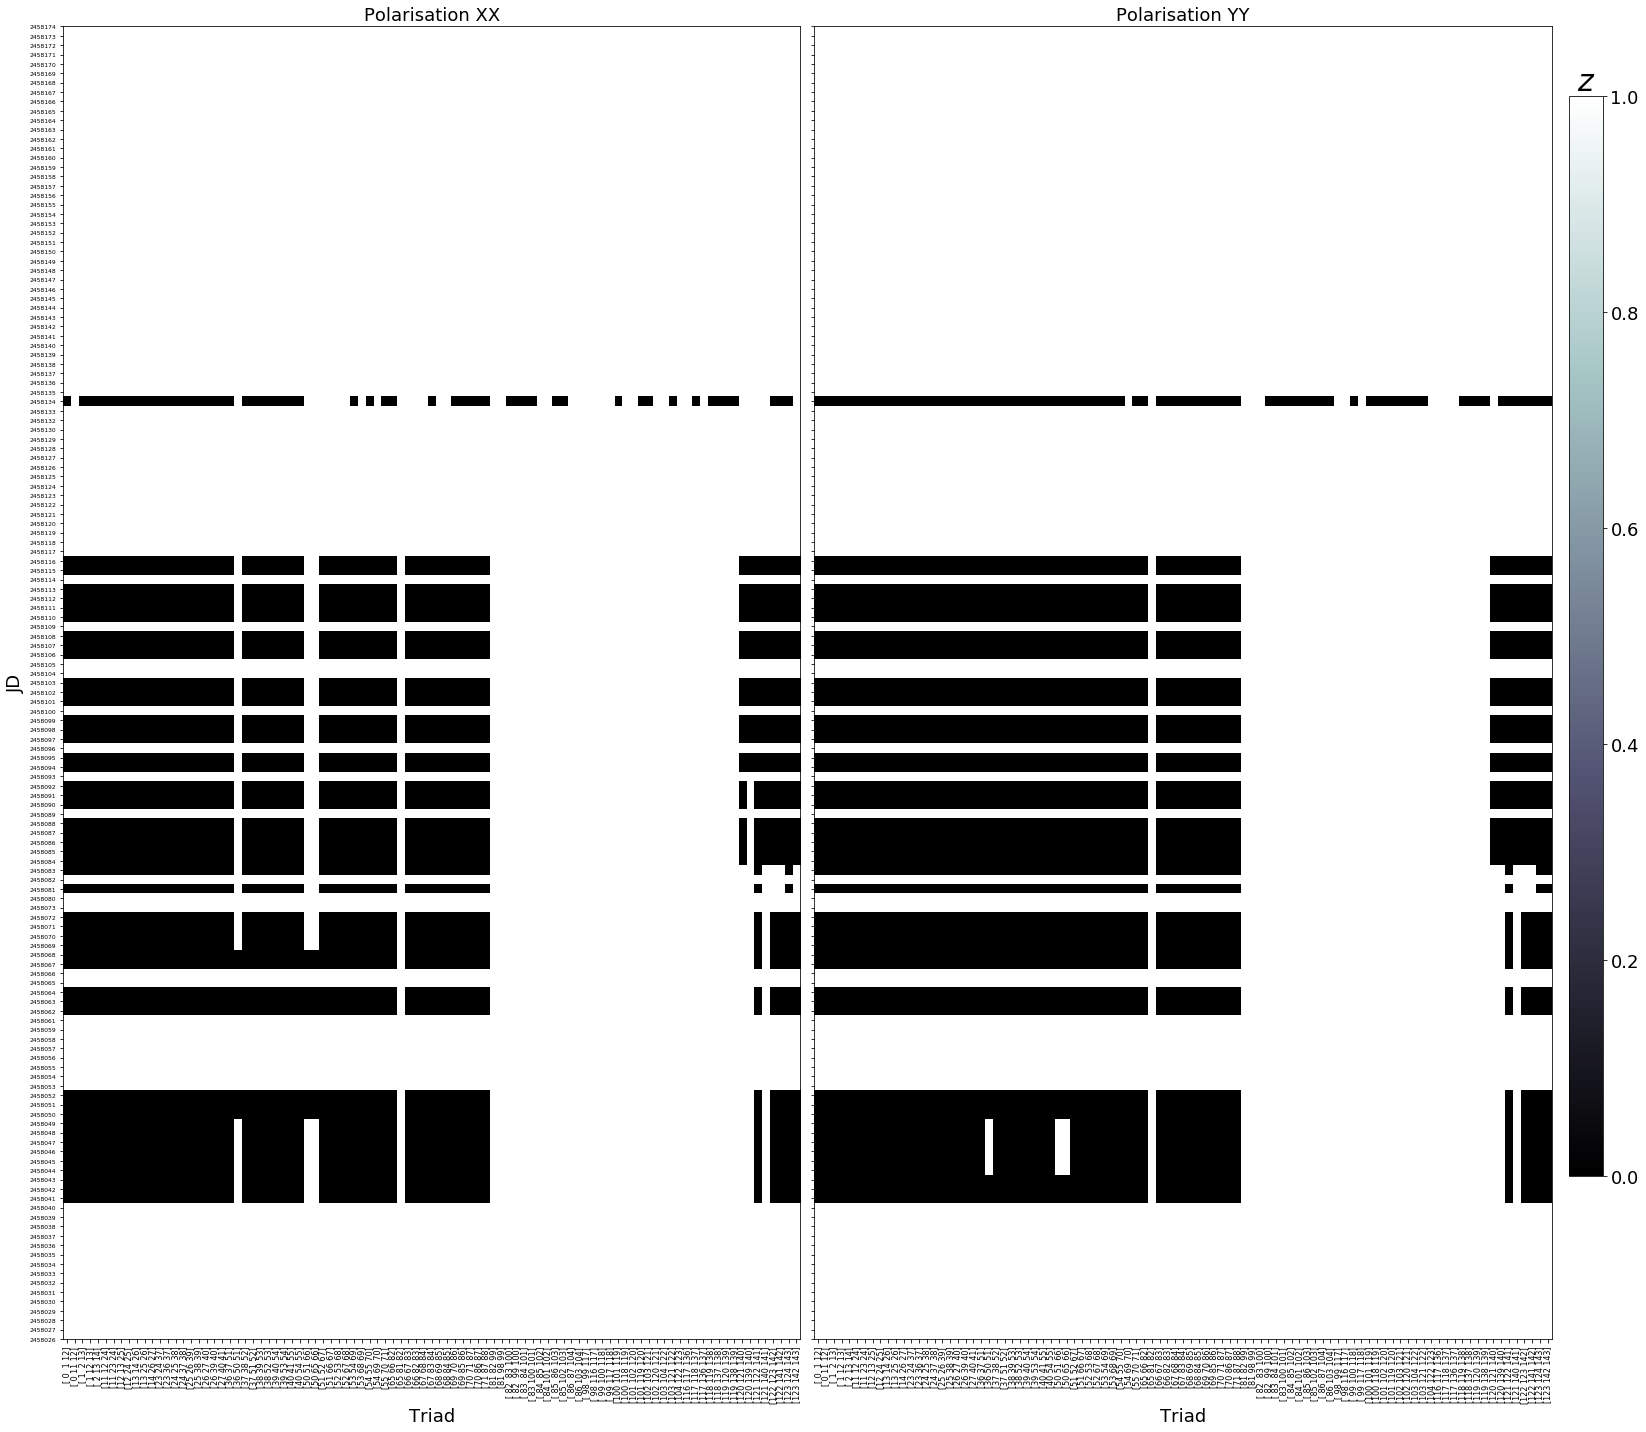

In [18]:
name = "EQ14_FB"
fl = np.zeros_like(data[name]["metric"]).astype(bool)
fl[np.where(data[name]["metric"] > 0.9)] = True
fl[np.isnan(data[name]["metric"])] = True
flags.update({name: fl})
trlist, jd = data[name]["triads"], data[name]["JD"]
plot.triad_jd_metric(fl, trlist, jd);

### Field B EQ28

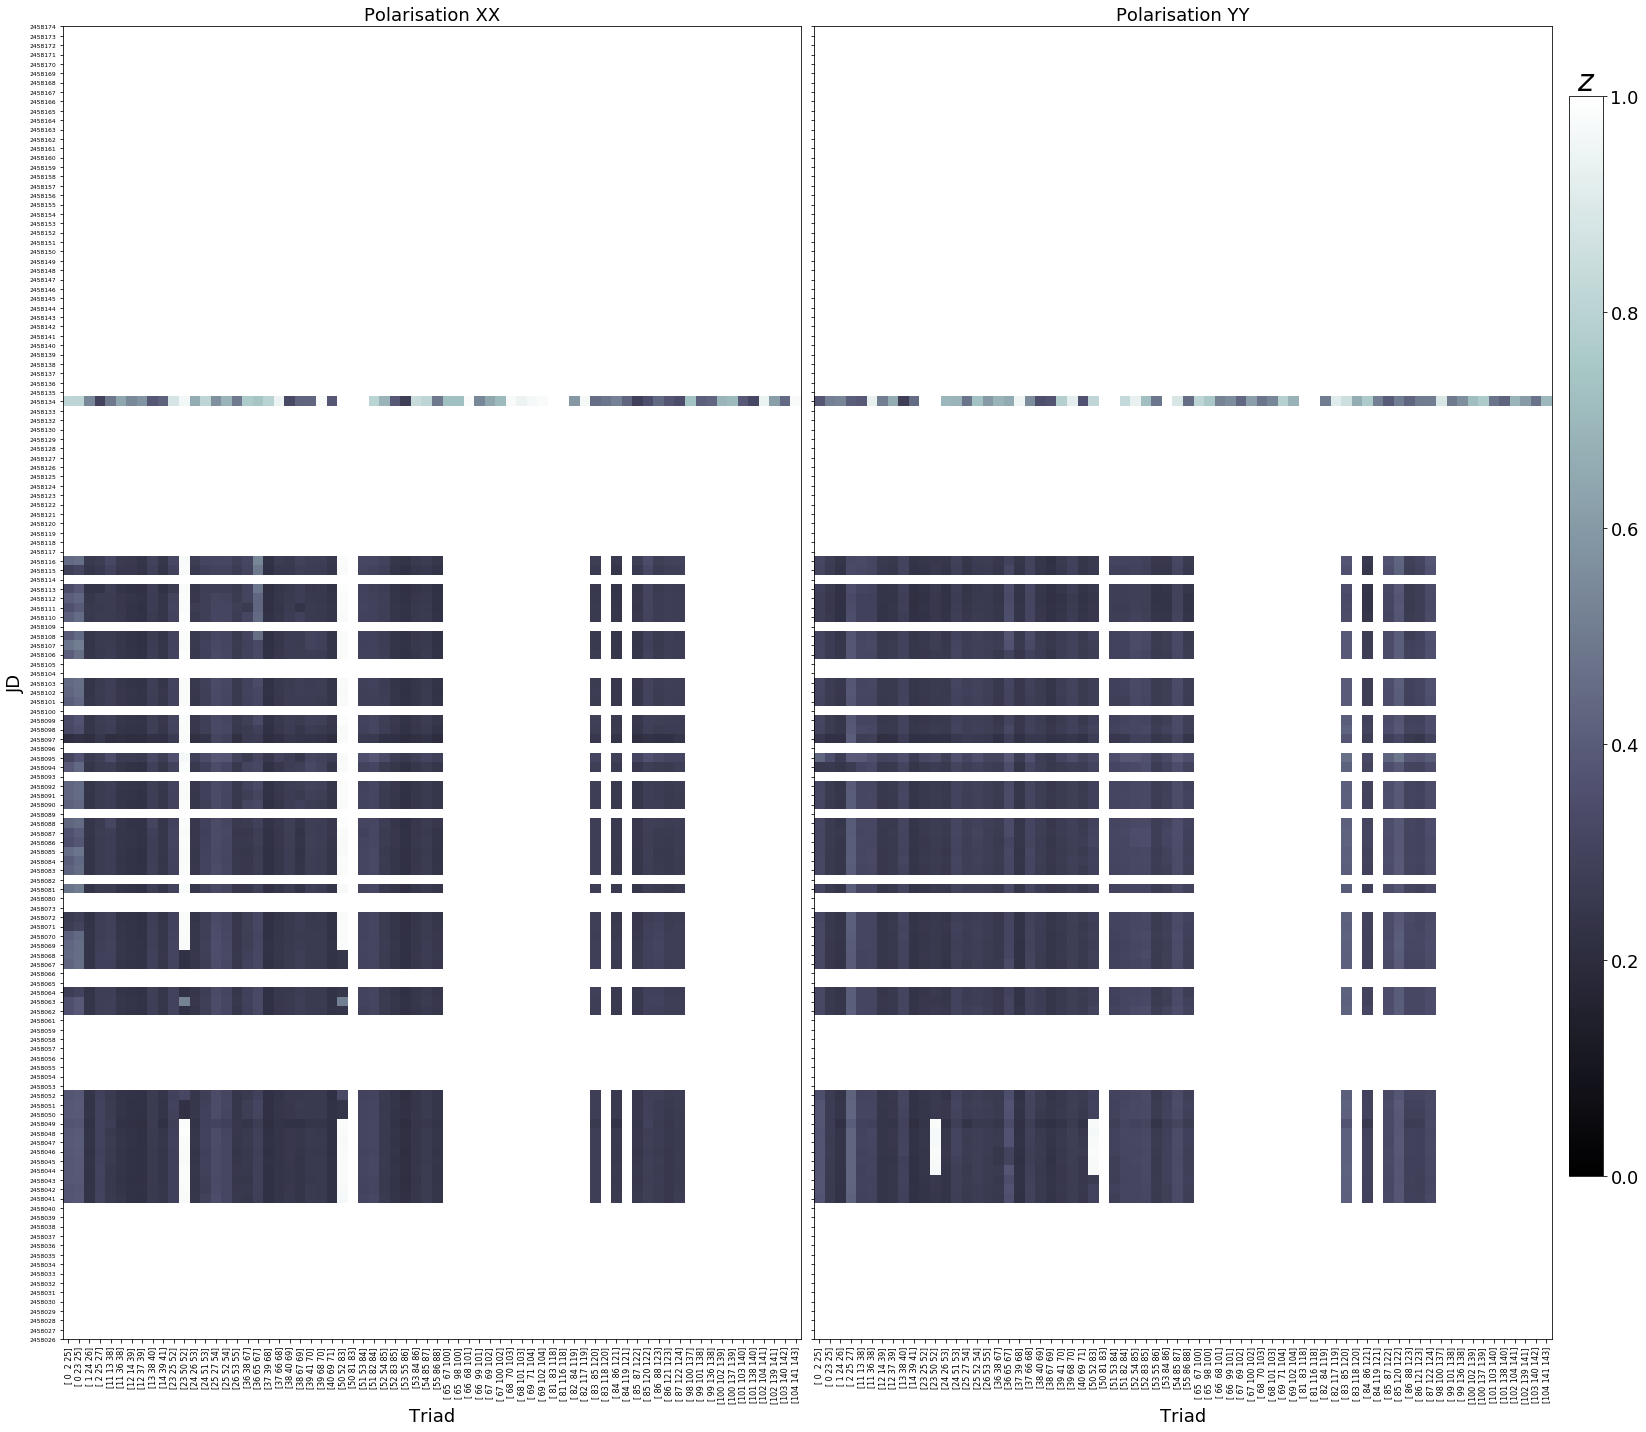

In [19]:
triad_jd_metric(data["EQ28_FB"])

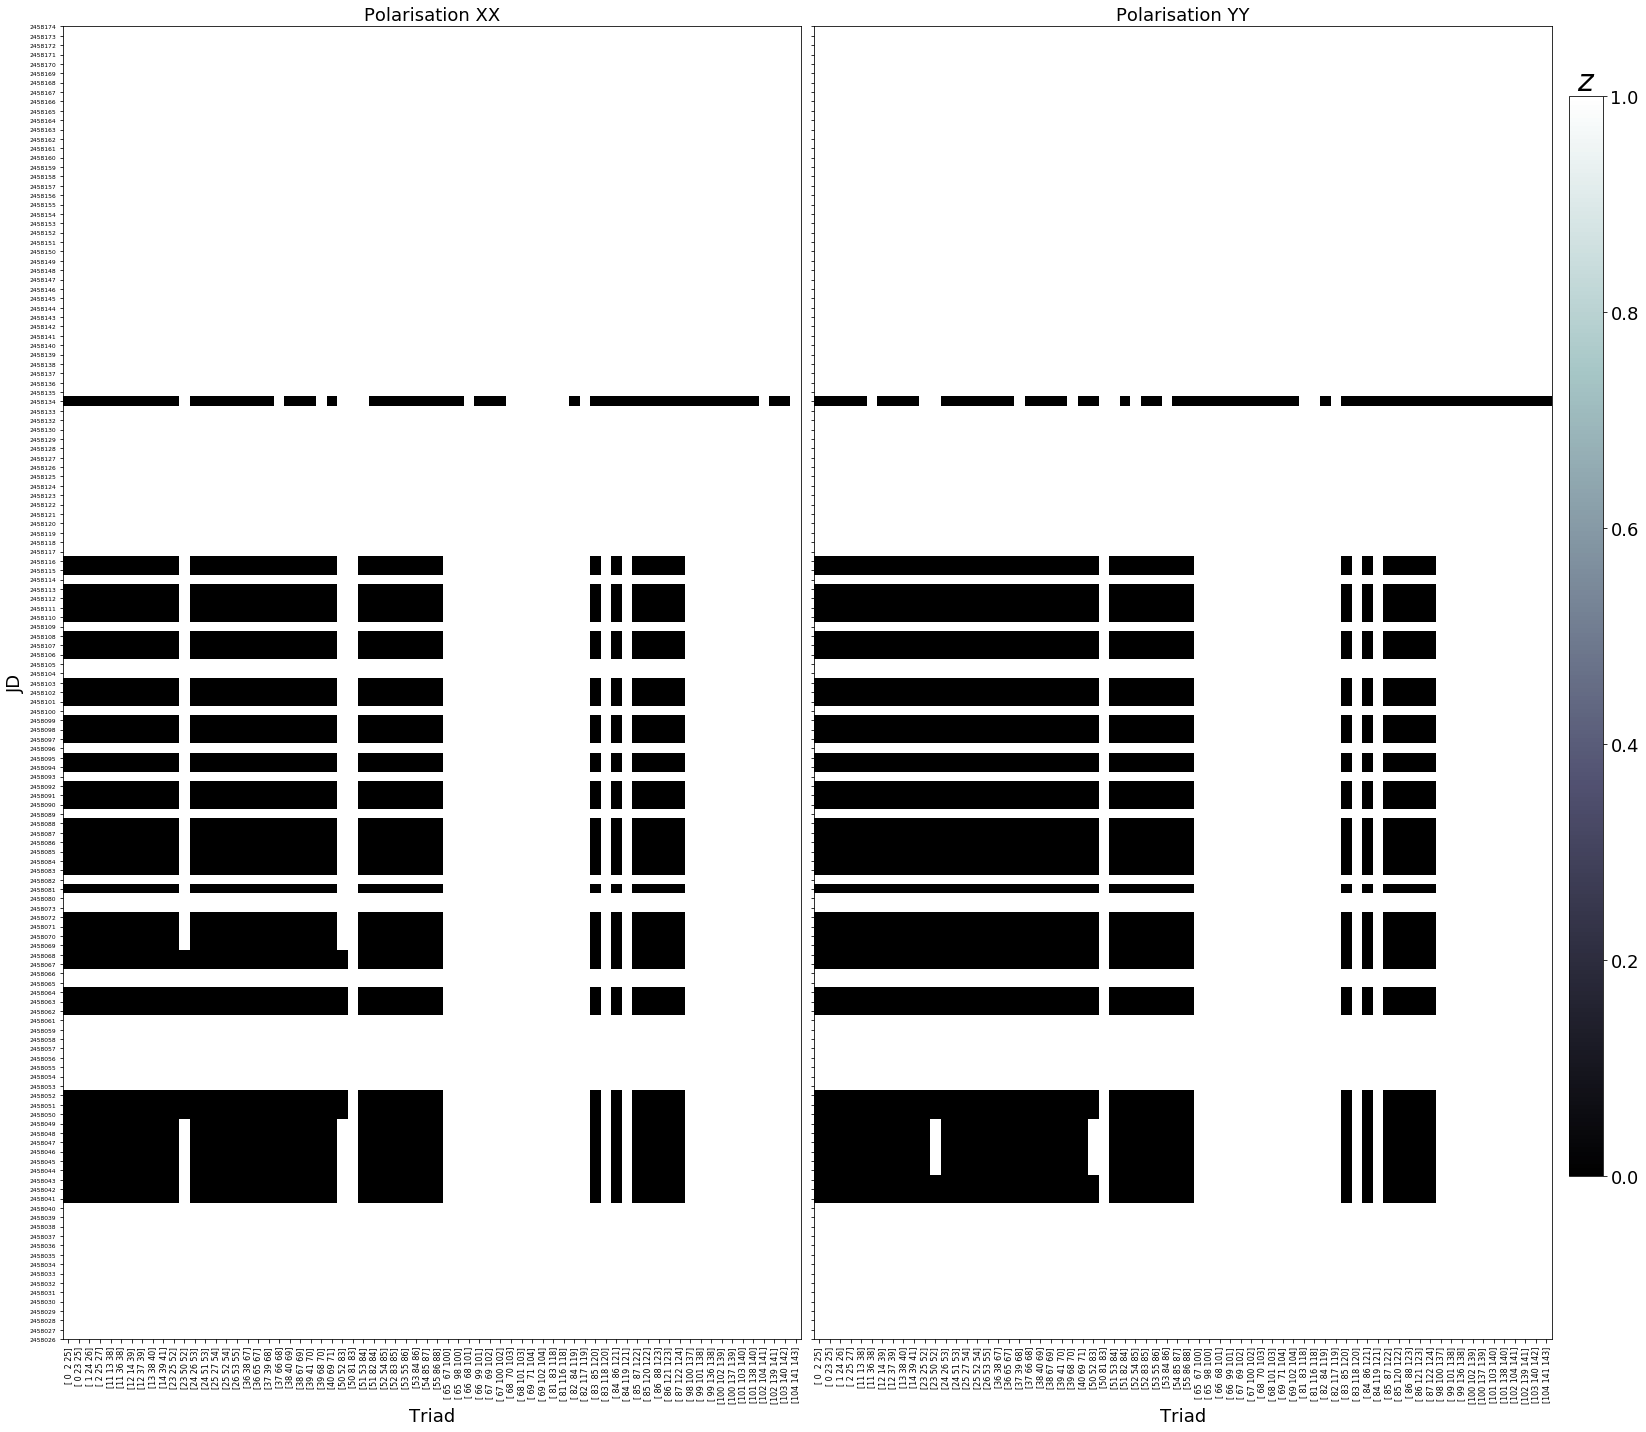

In [20]:
name = "EQ28_FB"
fl = np.zeros_like(data[name]["metric"]).astype(bool)
fl[np.where(data[name]["metric"] > 0.9)] = True
fl[np.isnan(data[name]["metric"])] = True
flags.update({name: fl})
trlist, jd = data[name]["triads"], data[name]["JD"]
plot.triad_jd_metric(fl, trlist, jd);

### Field C EQ14

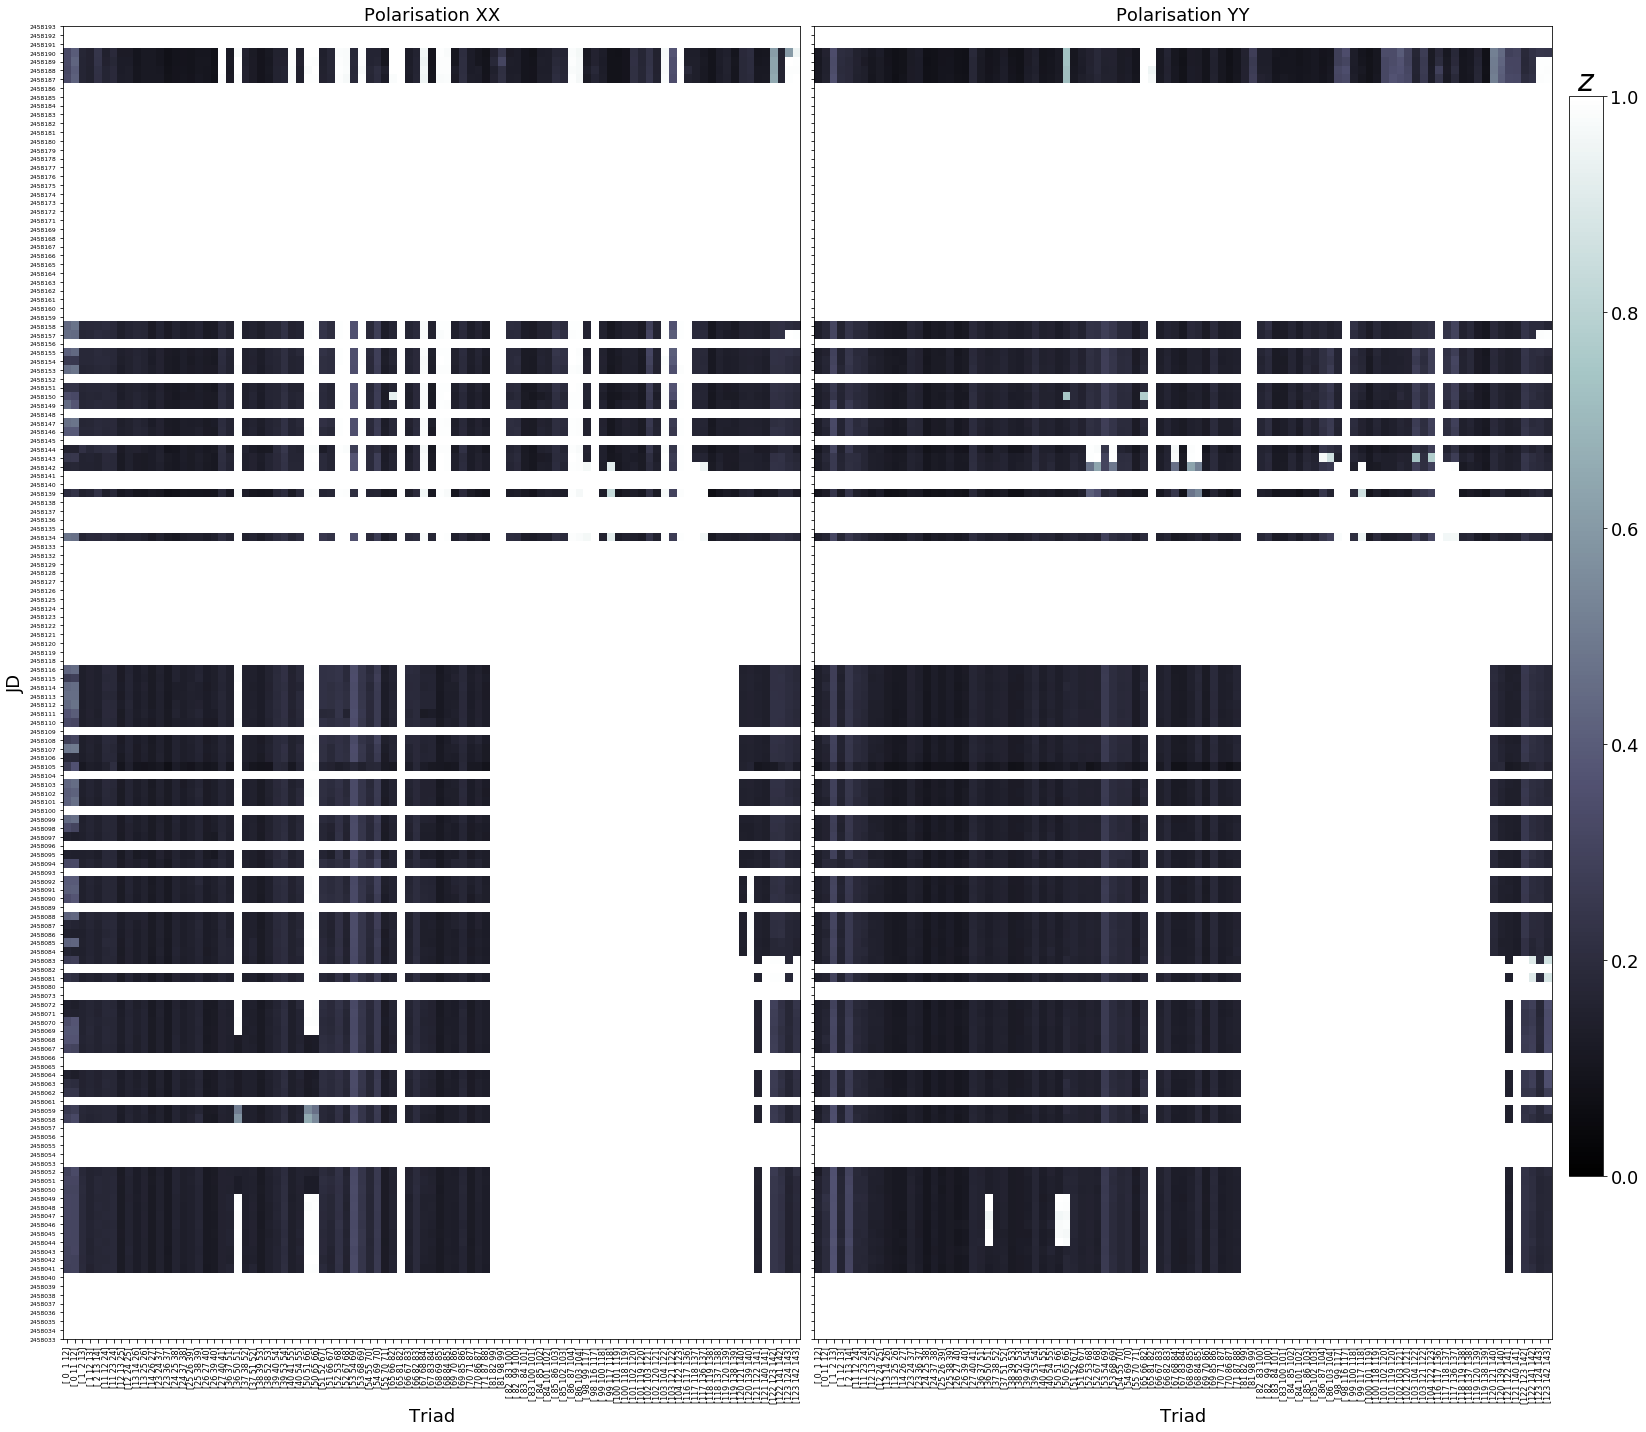

In [21]:
triad_jd_metric(data["EQ14_FC"])

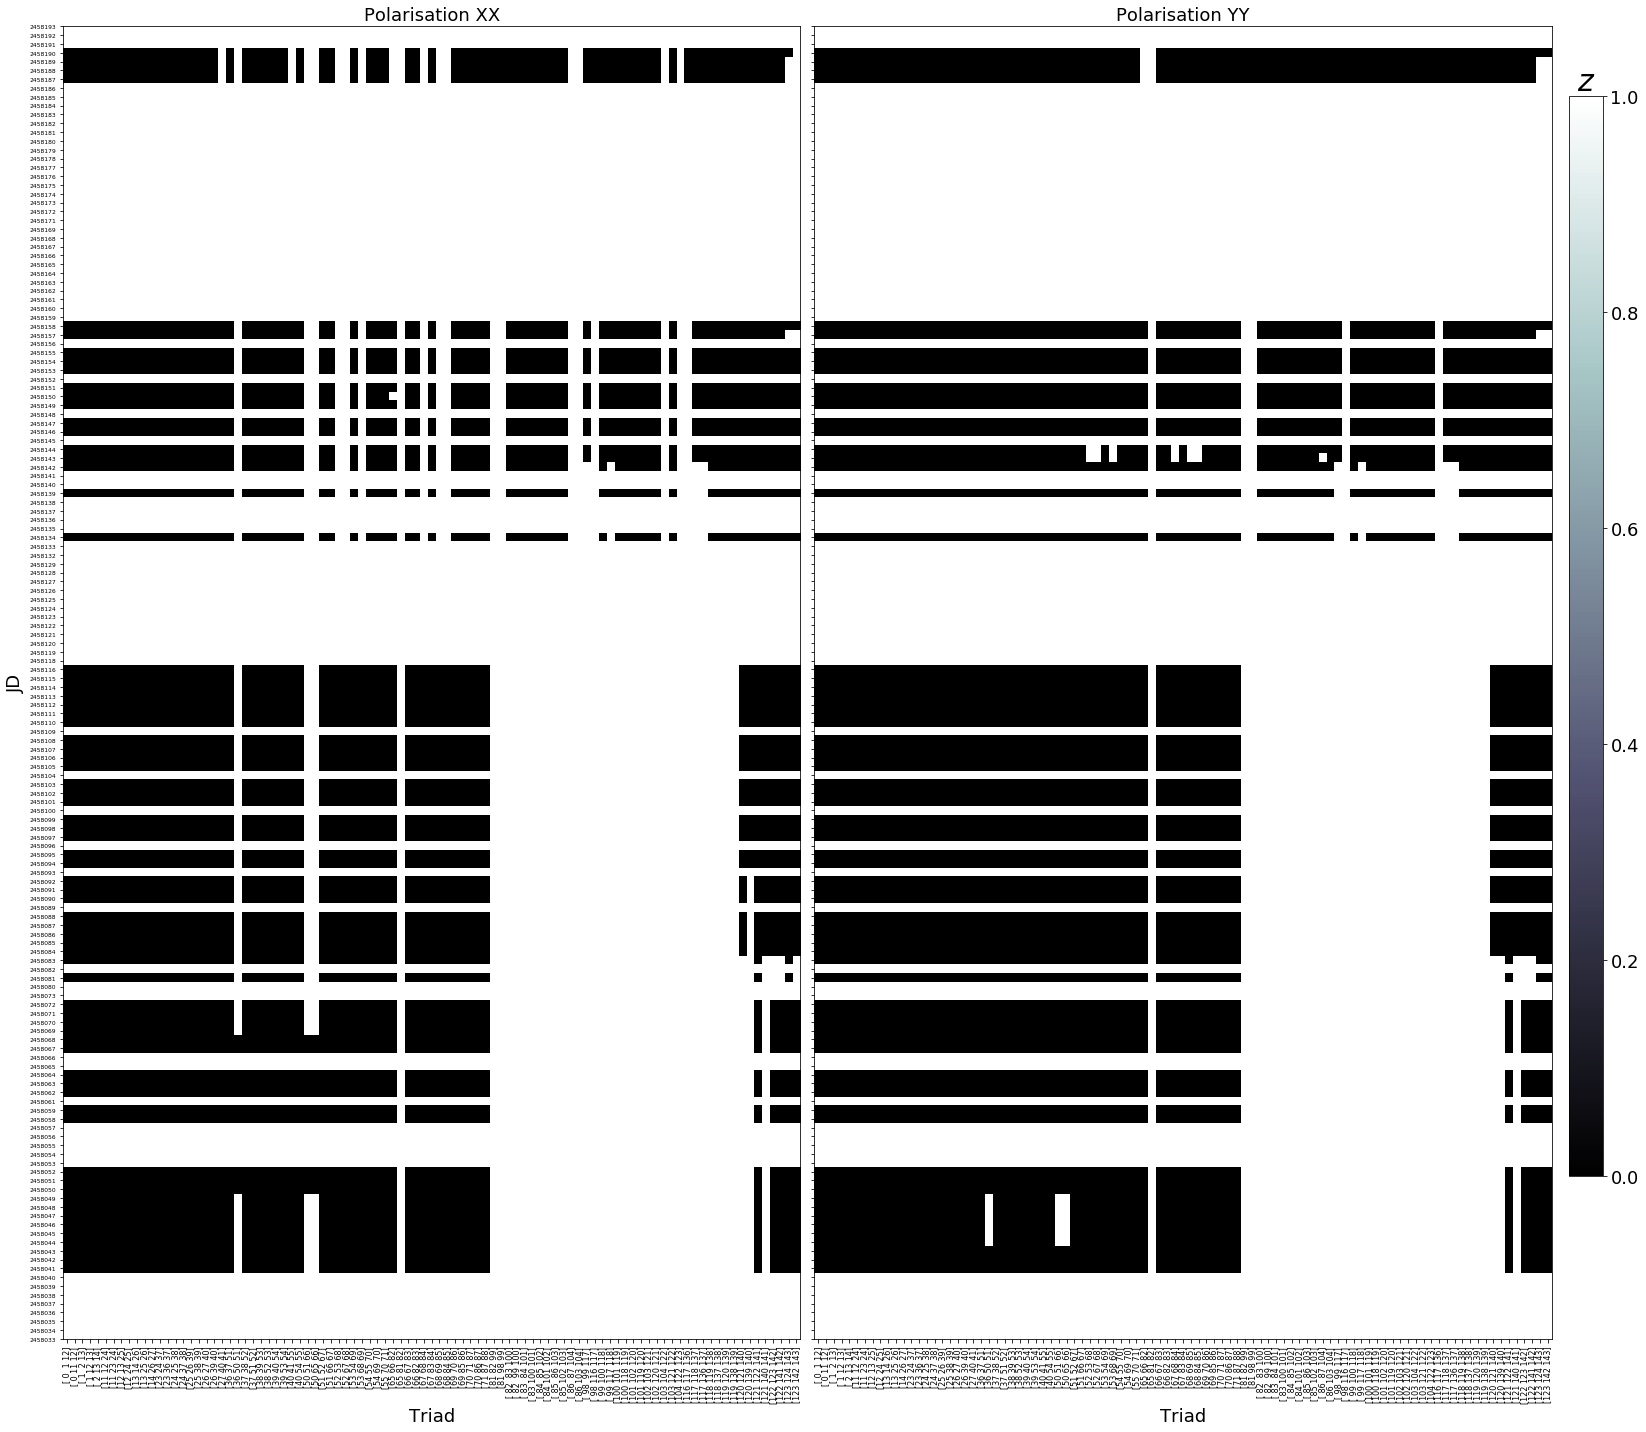

In [22]:
name = "EQ14_FC"
fl = np.zeros_like(data[name]["metric"]).astype(bool)
fl[np.where(data[name]["metric"] > 0.9)] = True
fl[np.isnan(data[name]["metric"])] = True
flags.update({name: fl})
trlist, jd = data[name]["triads"], data[name]["JD"]
plot.triad_jd_metric(fl, trlist, jd);

### Field C EQ28

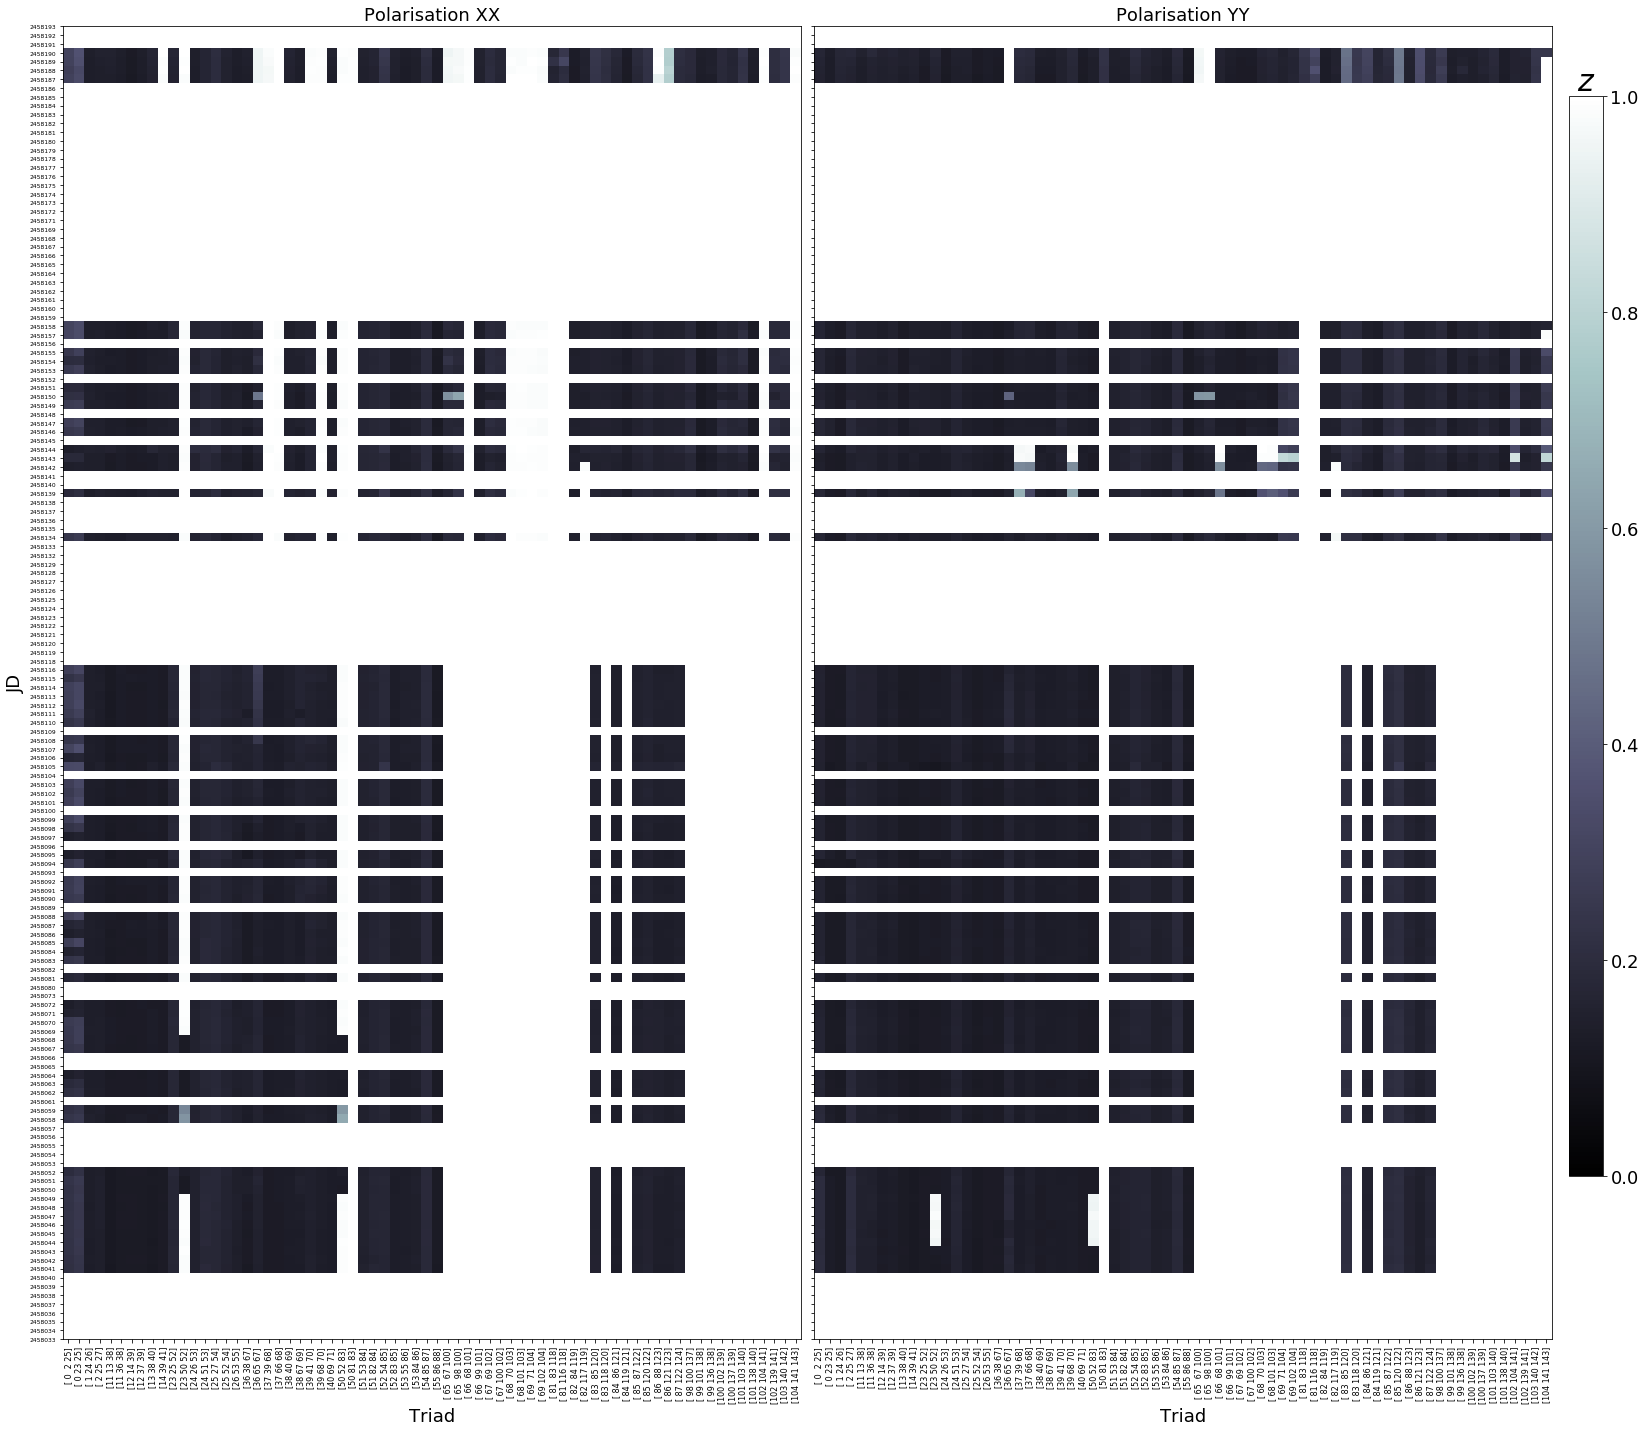

In [23]:
triad_jd_metric(data["EQ28_FC"])

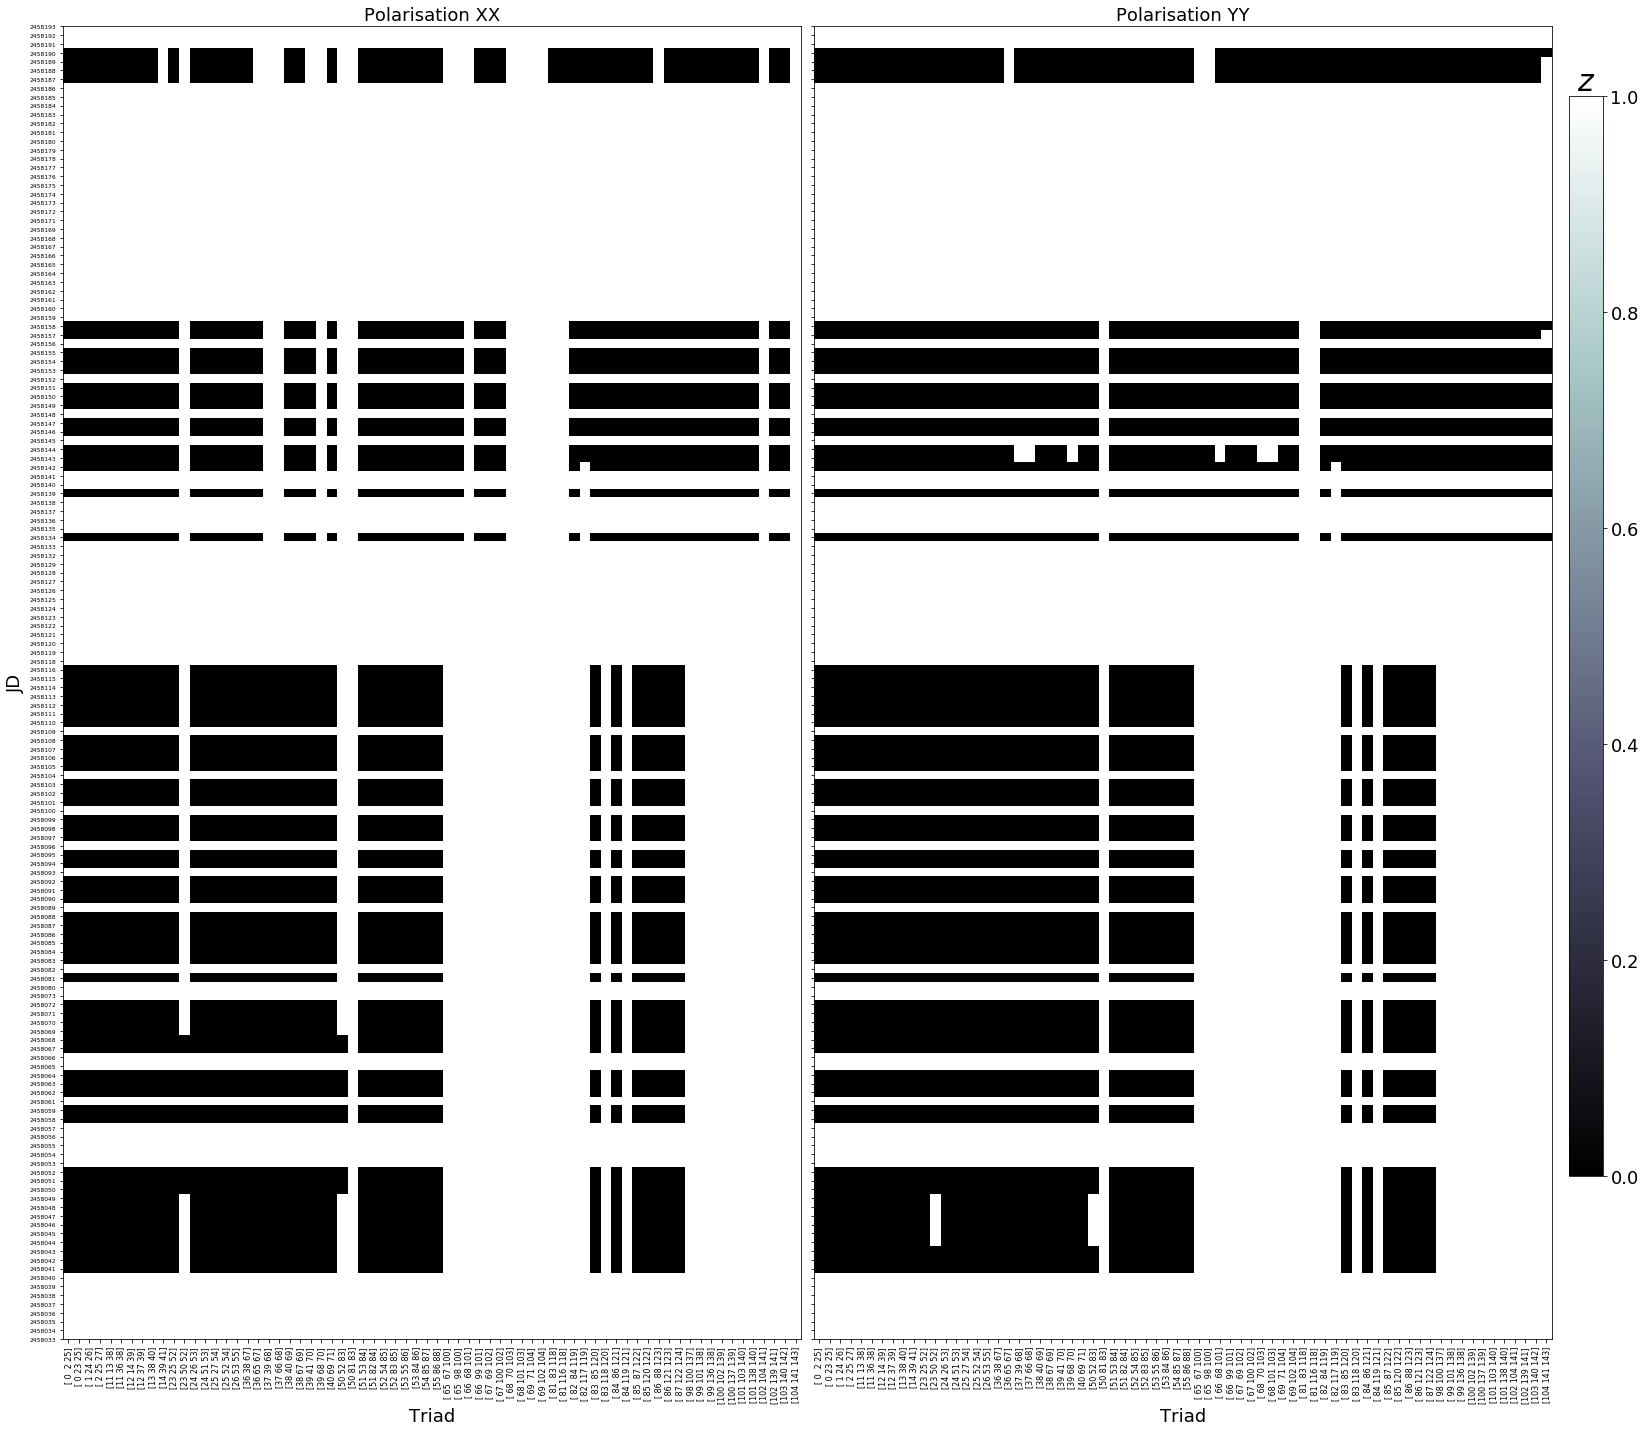

In [24]:
name = "EQ28_FC"
fl = np.zeros_like(data[name]["metric"]).astype(bool)
fl[np.where(data[name]["metric"] > 0.9)] = True
fl[np.isnan(data[name]["metric"])] = True
flags.update({name: fl})
trlist, jd = data[name]["triads"], data[name]["JD"]
plot.triad_jd_metric(fl, trlist, jd);

### Field D EQ14

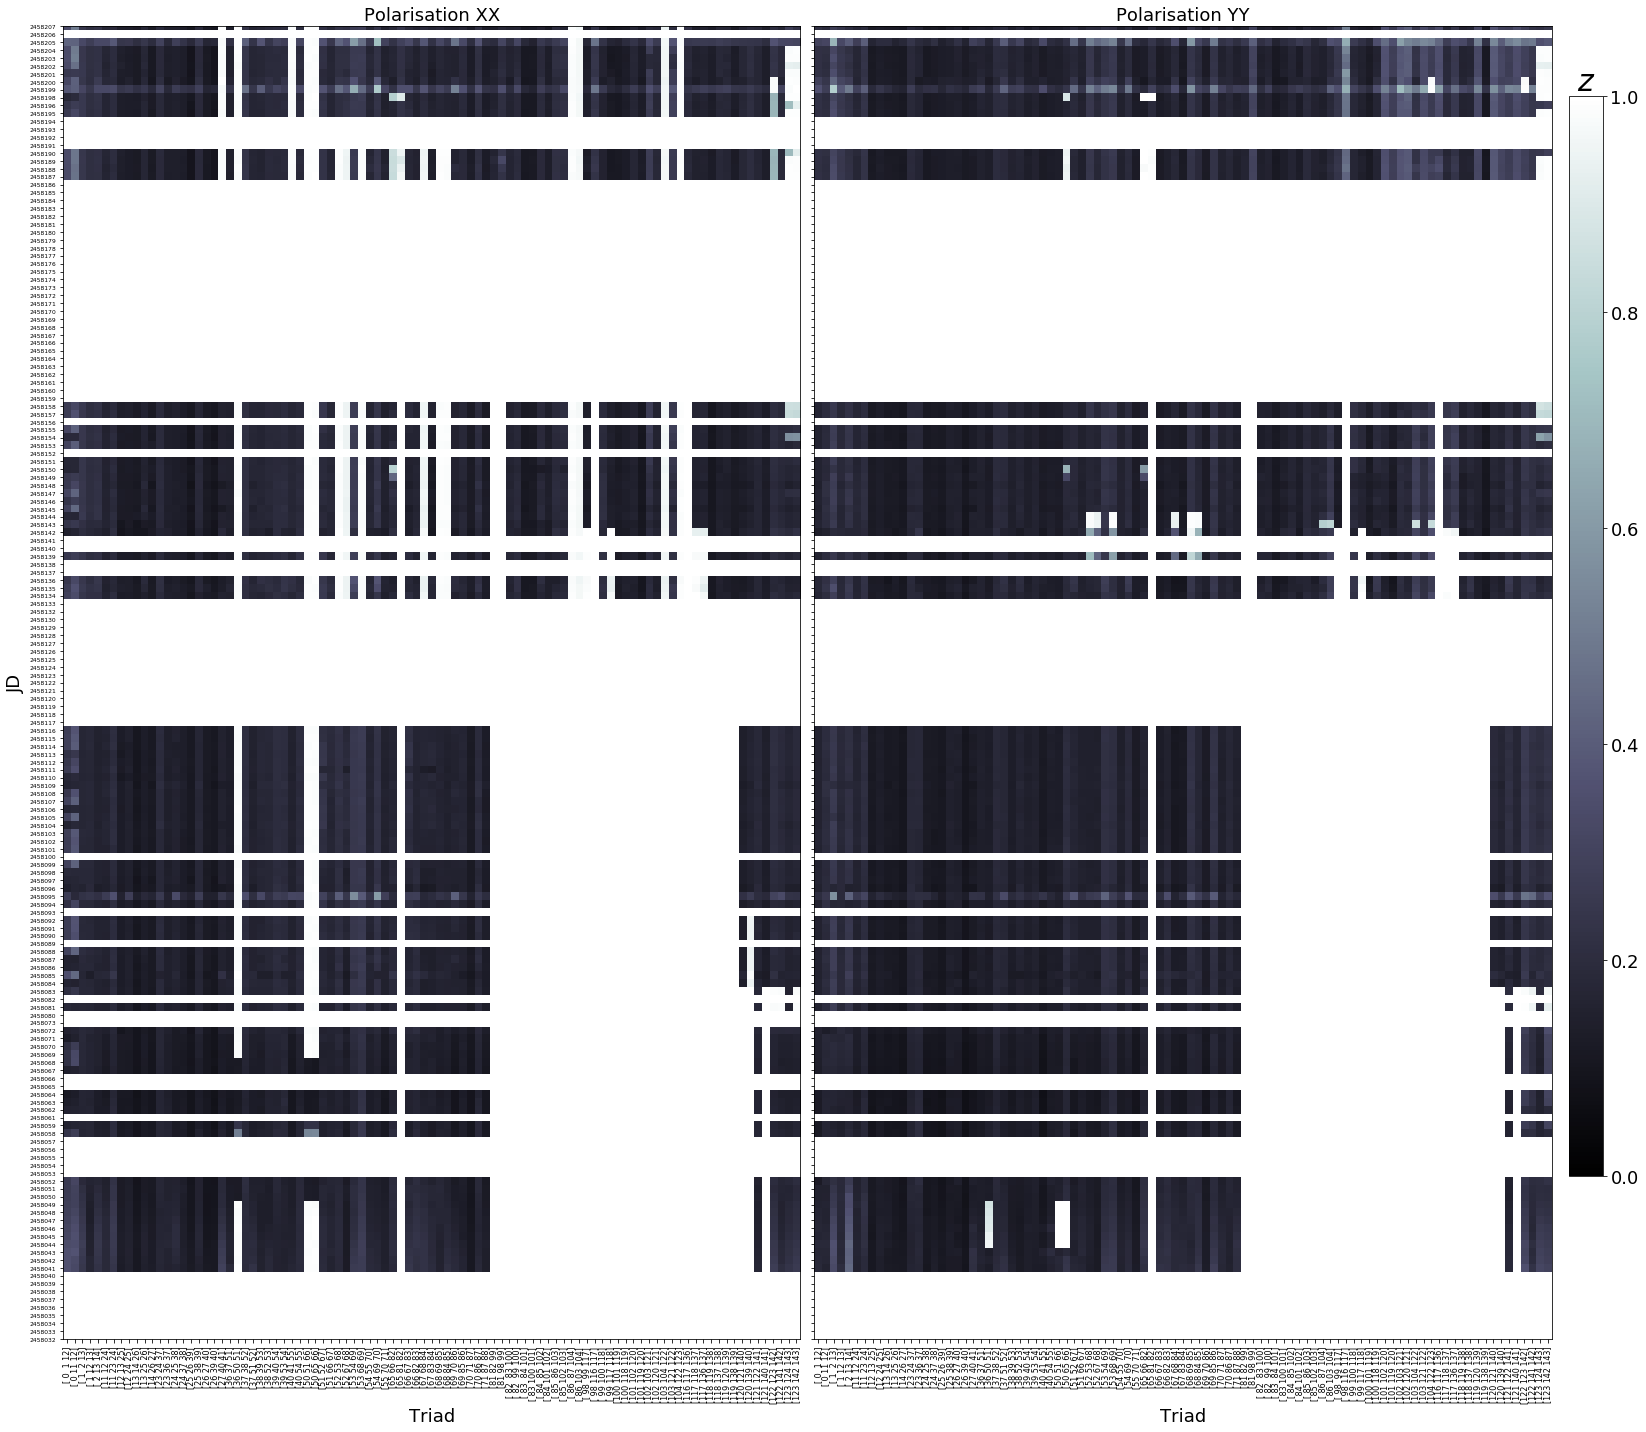

In [25]:
triad_jd_metric(data["EQ14_FD"])

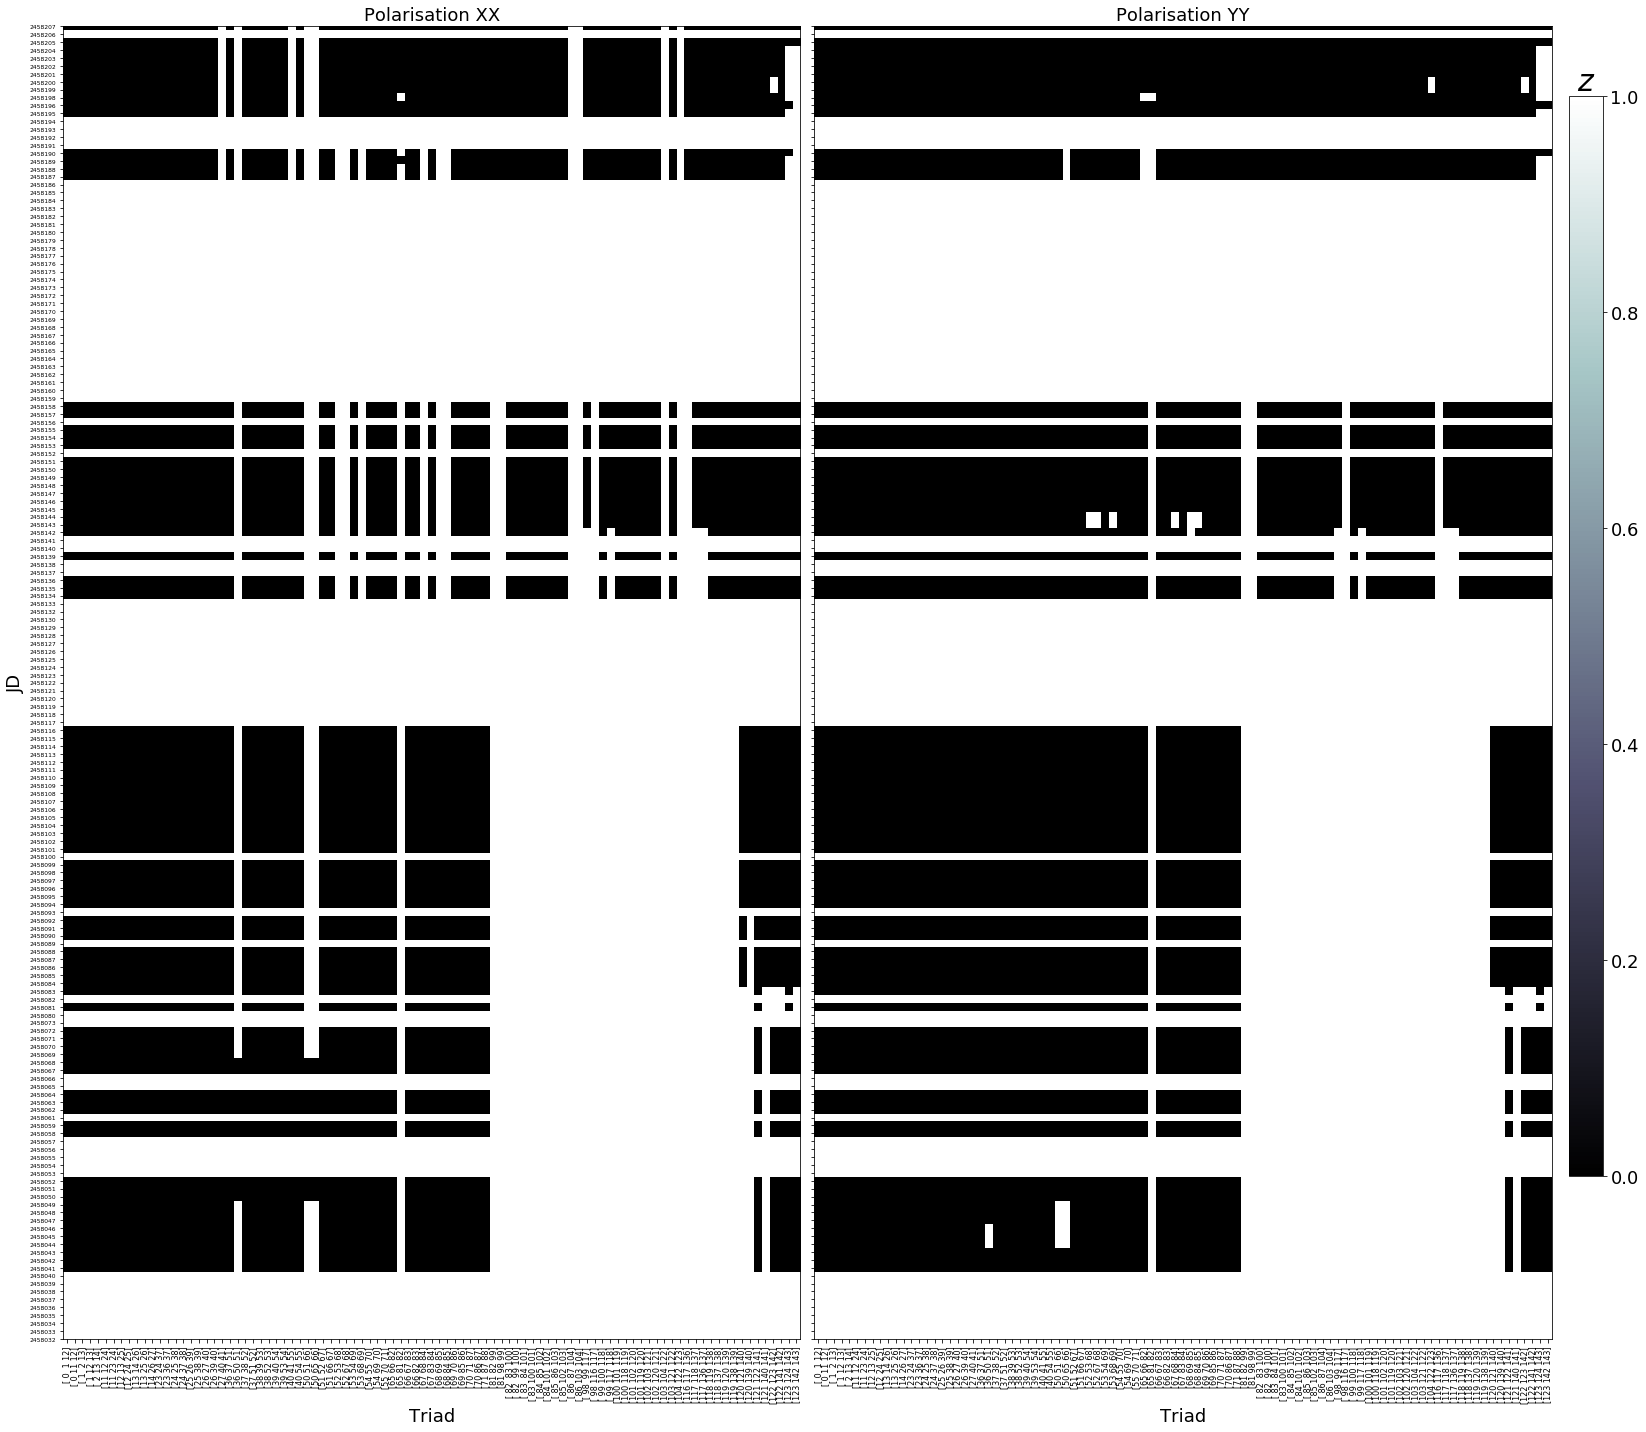

In [26]:
name = "EQ14_FD"
fl = np.zeros_like(data[name]["metric"]).astype(bool)
fl[np.where(data[name]["metric"] > 0.9)] = True
fl[np.isnan(data[name]["metric"])] = True
flags.update({name: fl})
trlist, jd = data[name]["triads"], data[name]["JD"]
plot.triad_jd_metric(fl, trlist, jd);

### Field D EQ28

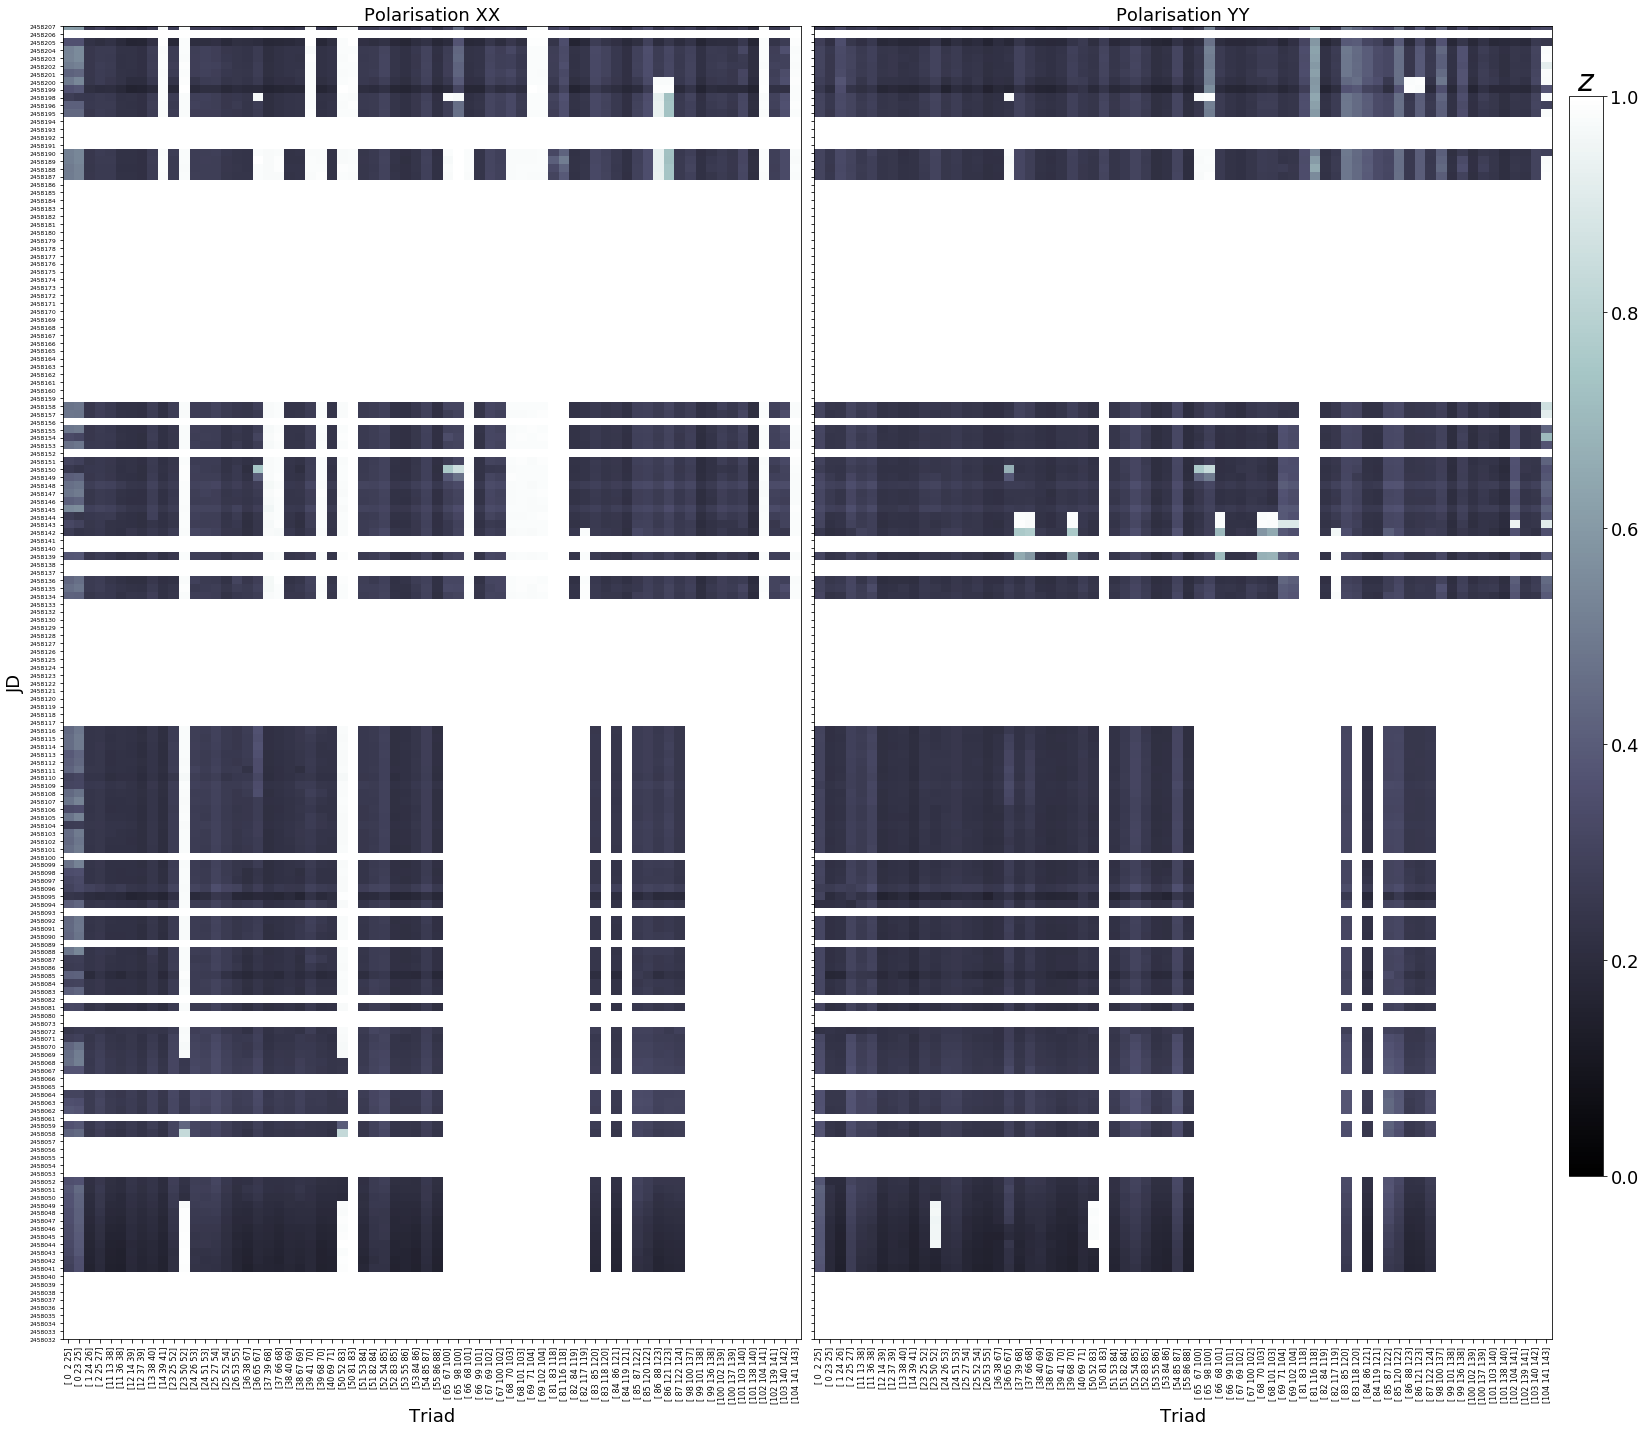

In [27]:
triad_jd_metric(data["EQ28_FD"])

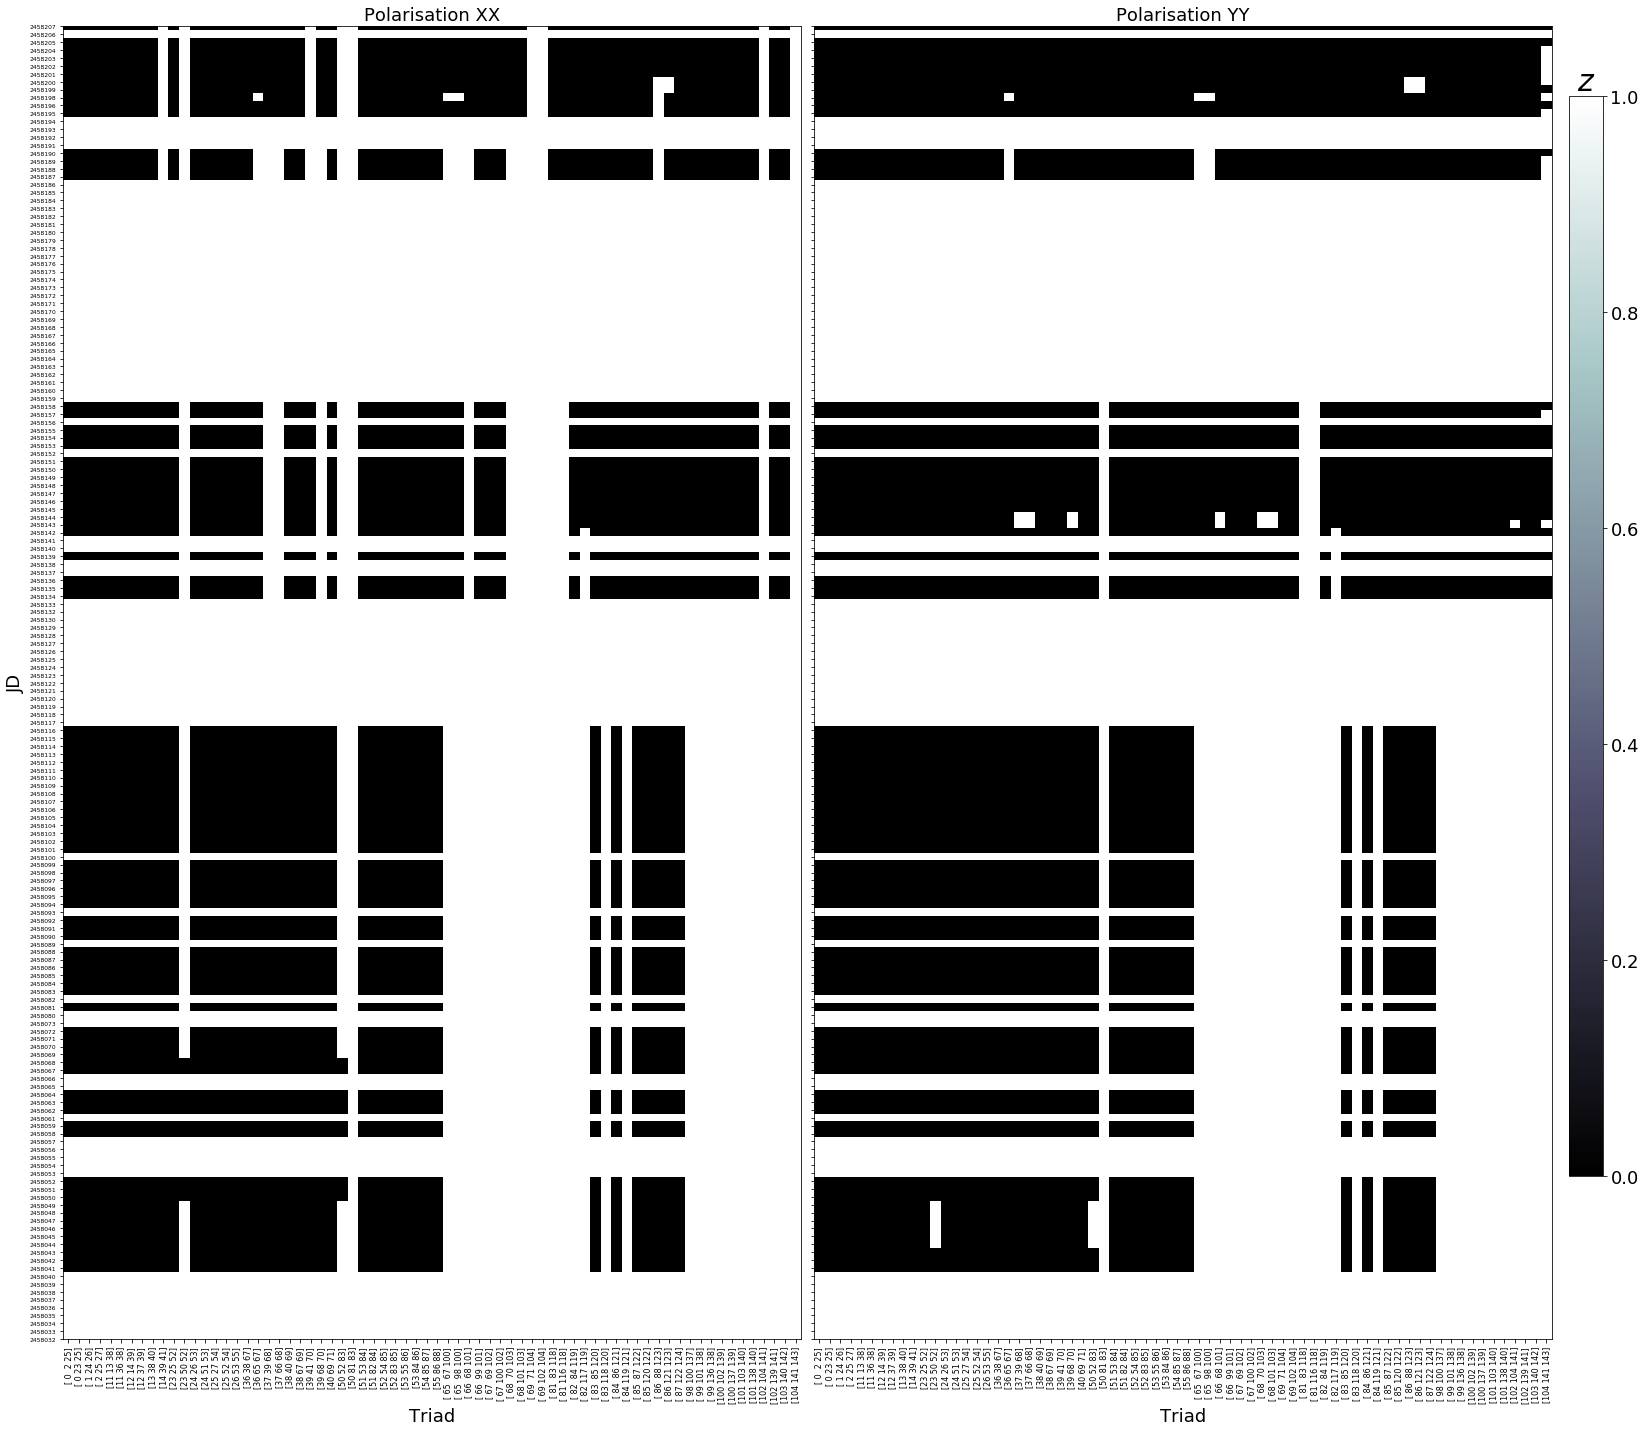

In [28]:
name = "EQ28_FD"
fl = np.zeros_like(data[name]["metric"]).astype(bool)
fl[np.where(data[name]["metric"] > 0.9)] = True
fl[np.isnan(data[name]["metric"])] = True
flags.update({name: fl})
trlist, jd = data[name]["triads"], data[name]["JD"]
plot.triad_jd_metric(fl, trlist, jd);

### Field E EQ14

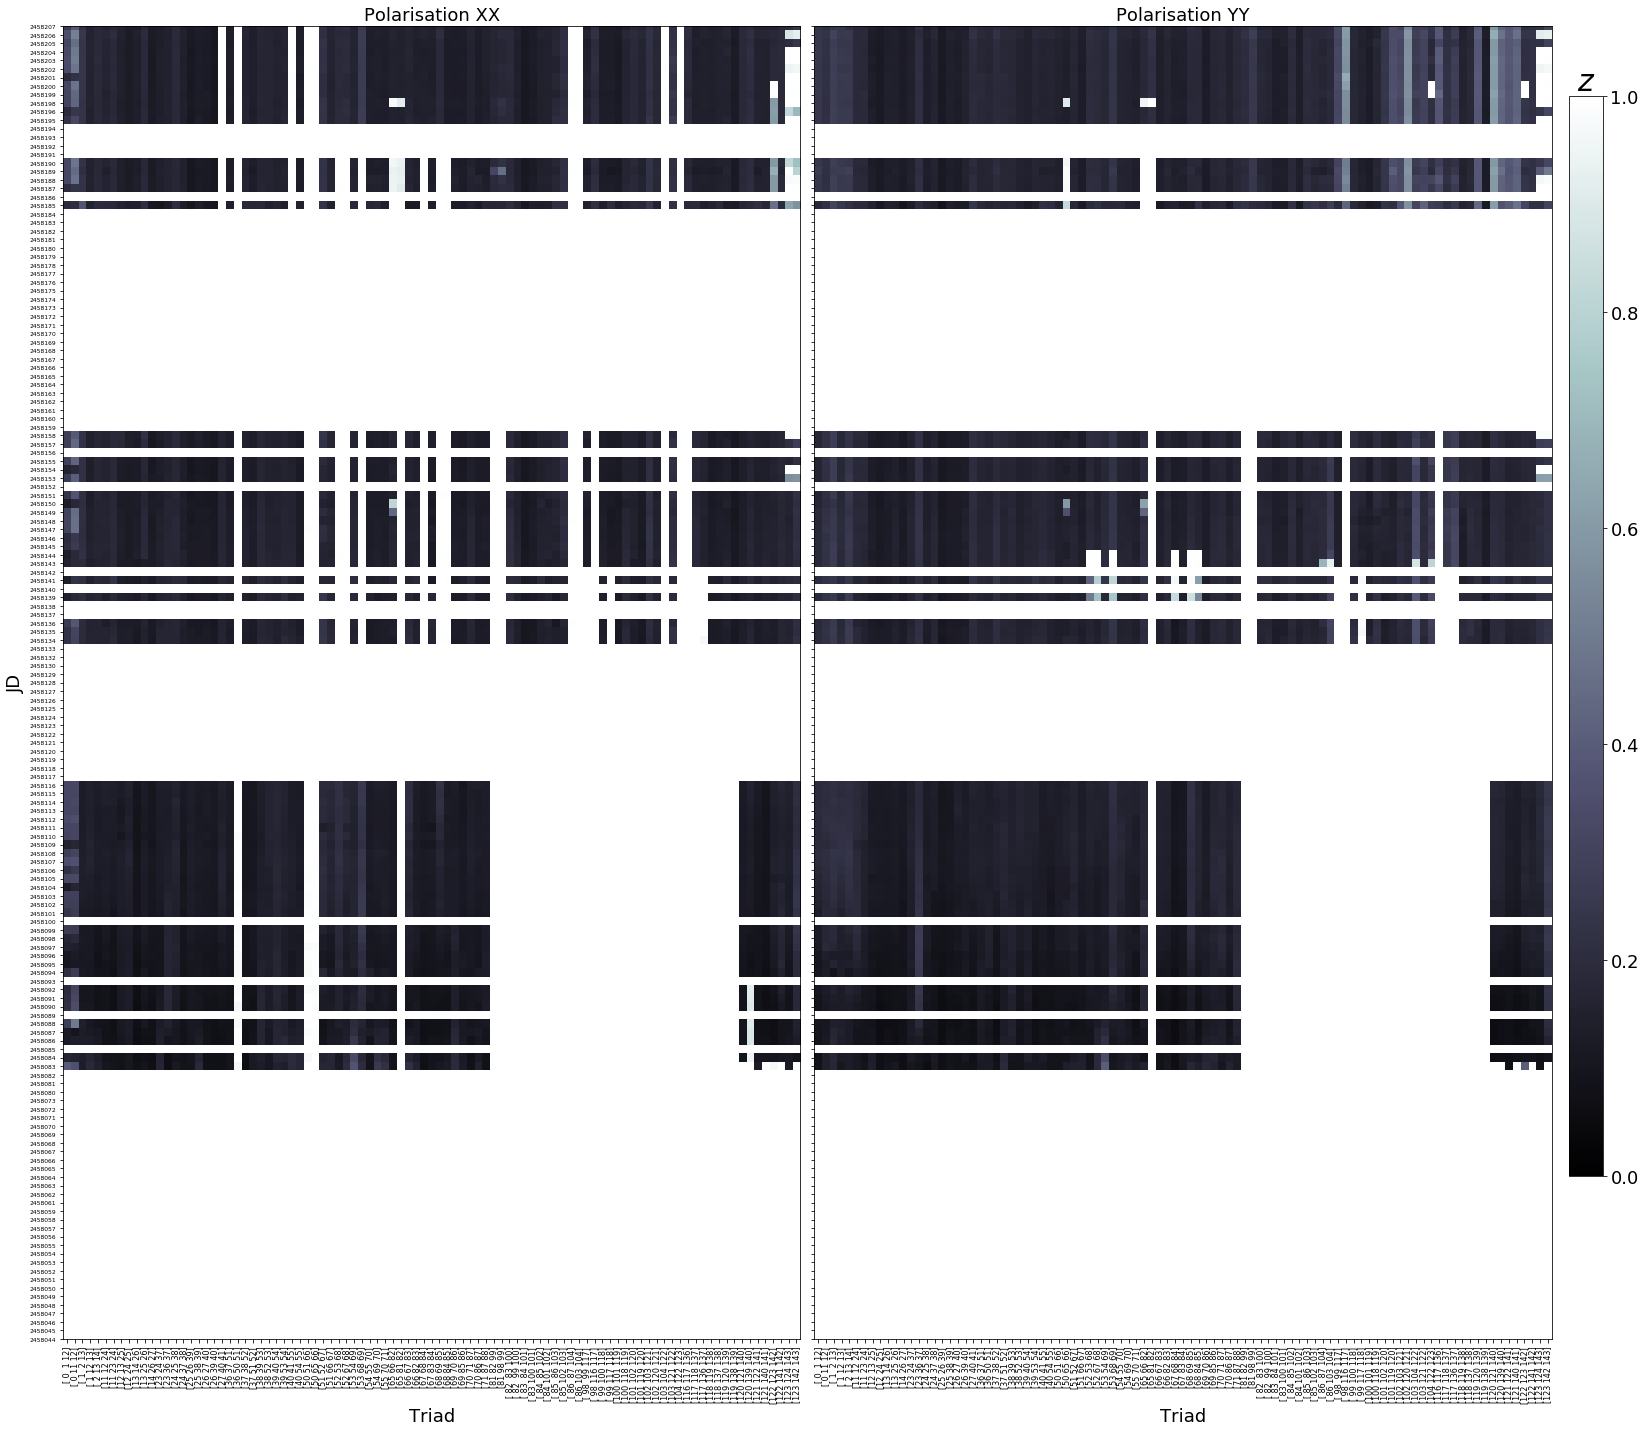

In [29]:
triad_jd_metric(data["EQ14_FE"])

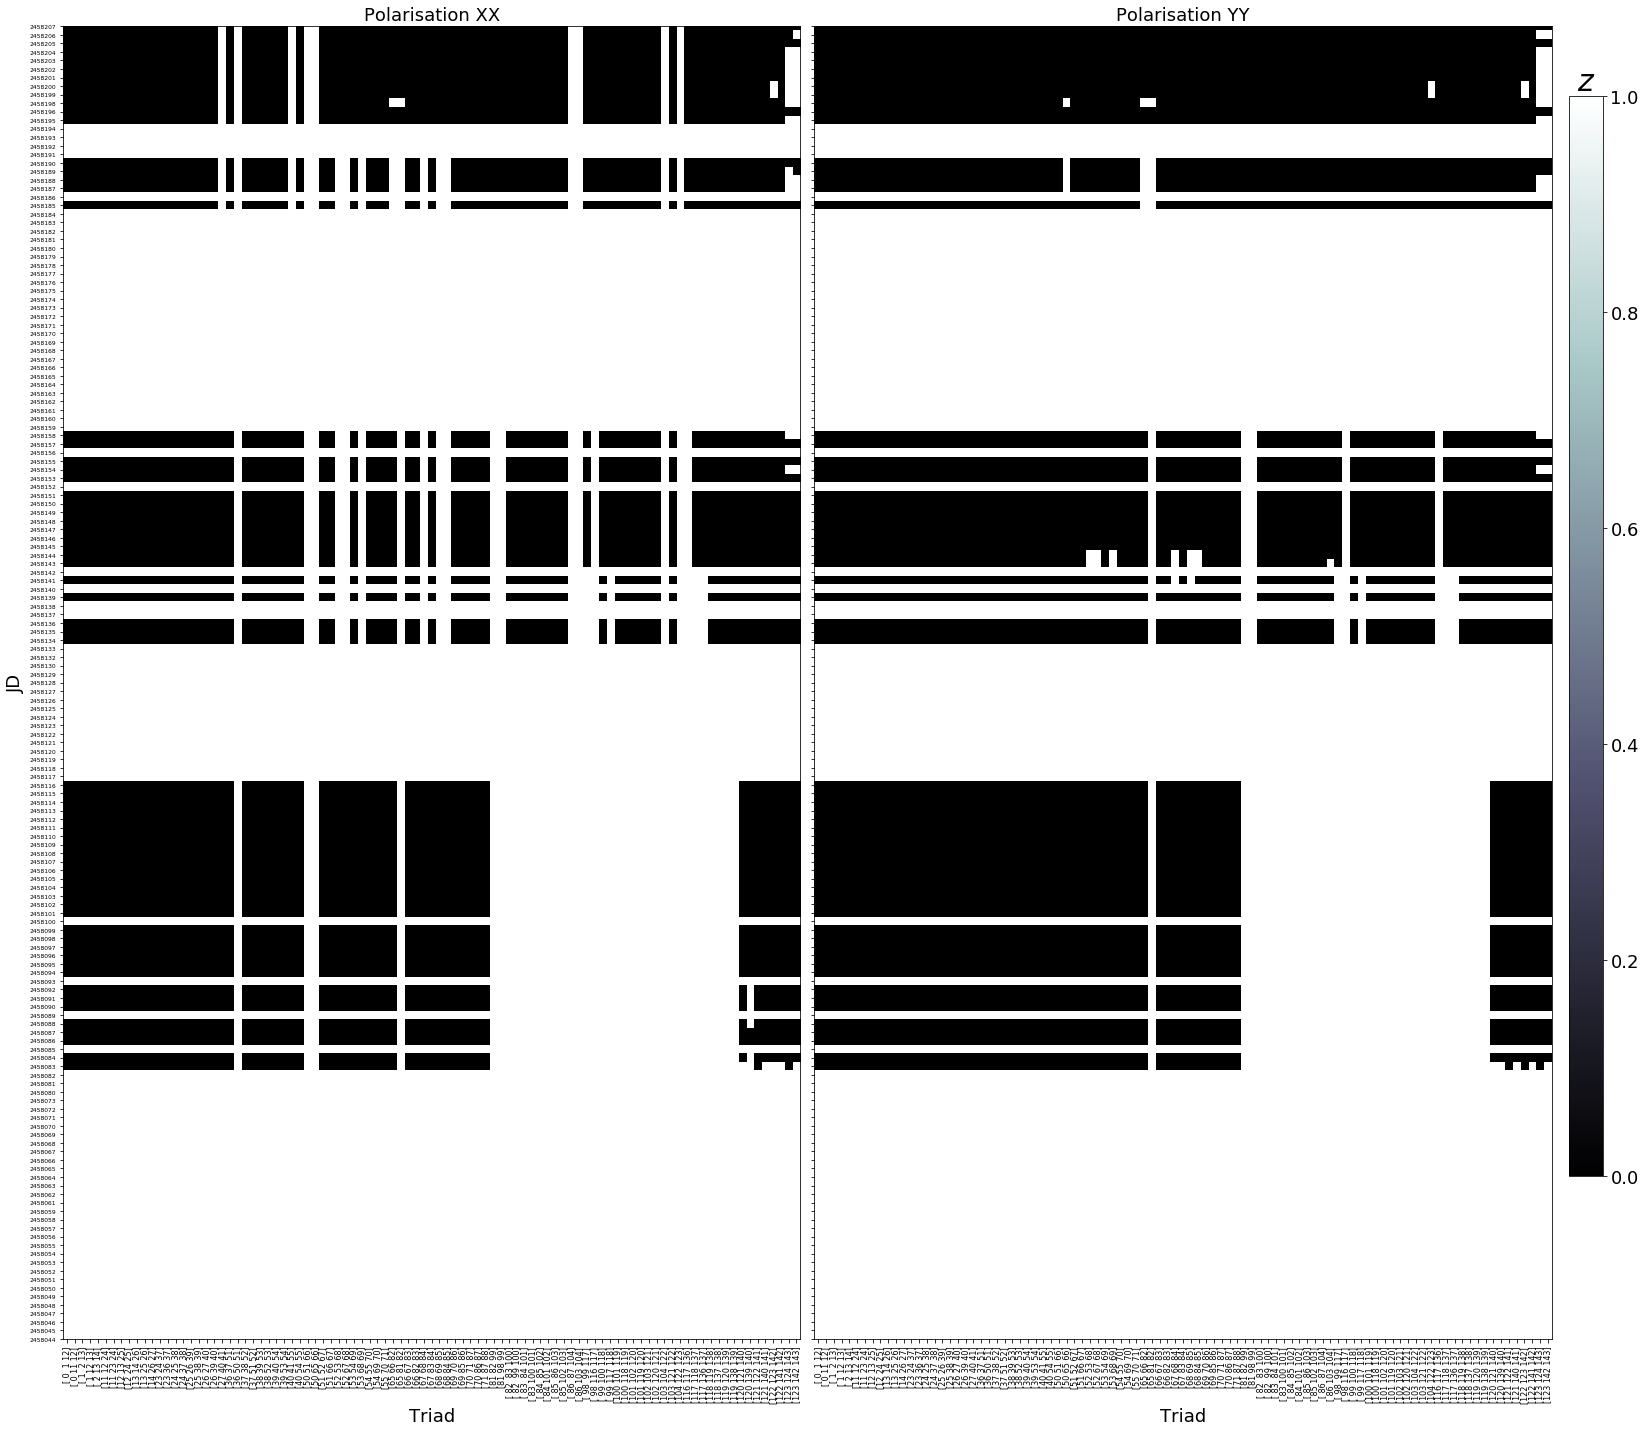

In [30]:
name = "EQ14_FE"
fl = np.zeros_like(data[name]["metric"]).astype(bool)
fl[np.where(data[name]["metric"] > 0.9)] = True
fl[np.isnan(data[name]["metric"])] = True
flags.update({name: fl})
trlist, jd = data[name]["triads"], data[name]["JD"]
plot.triad_jd_metric(fl, trlist, jd);

### Field E EQ28

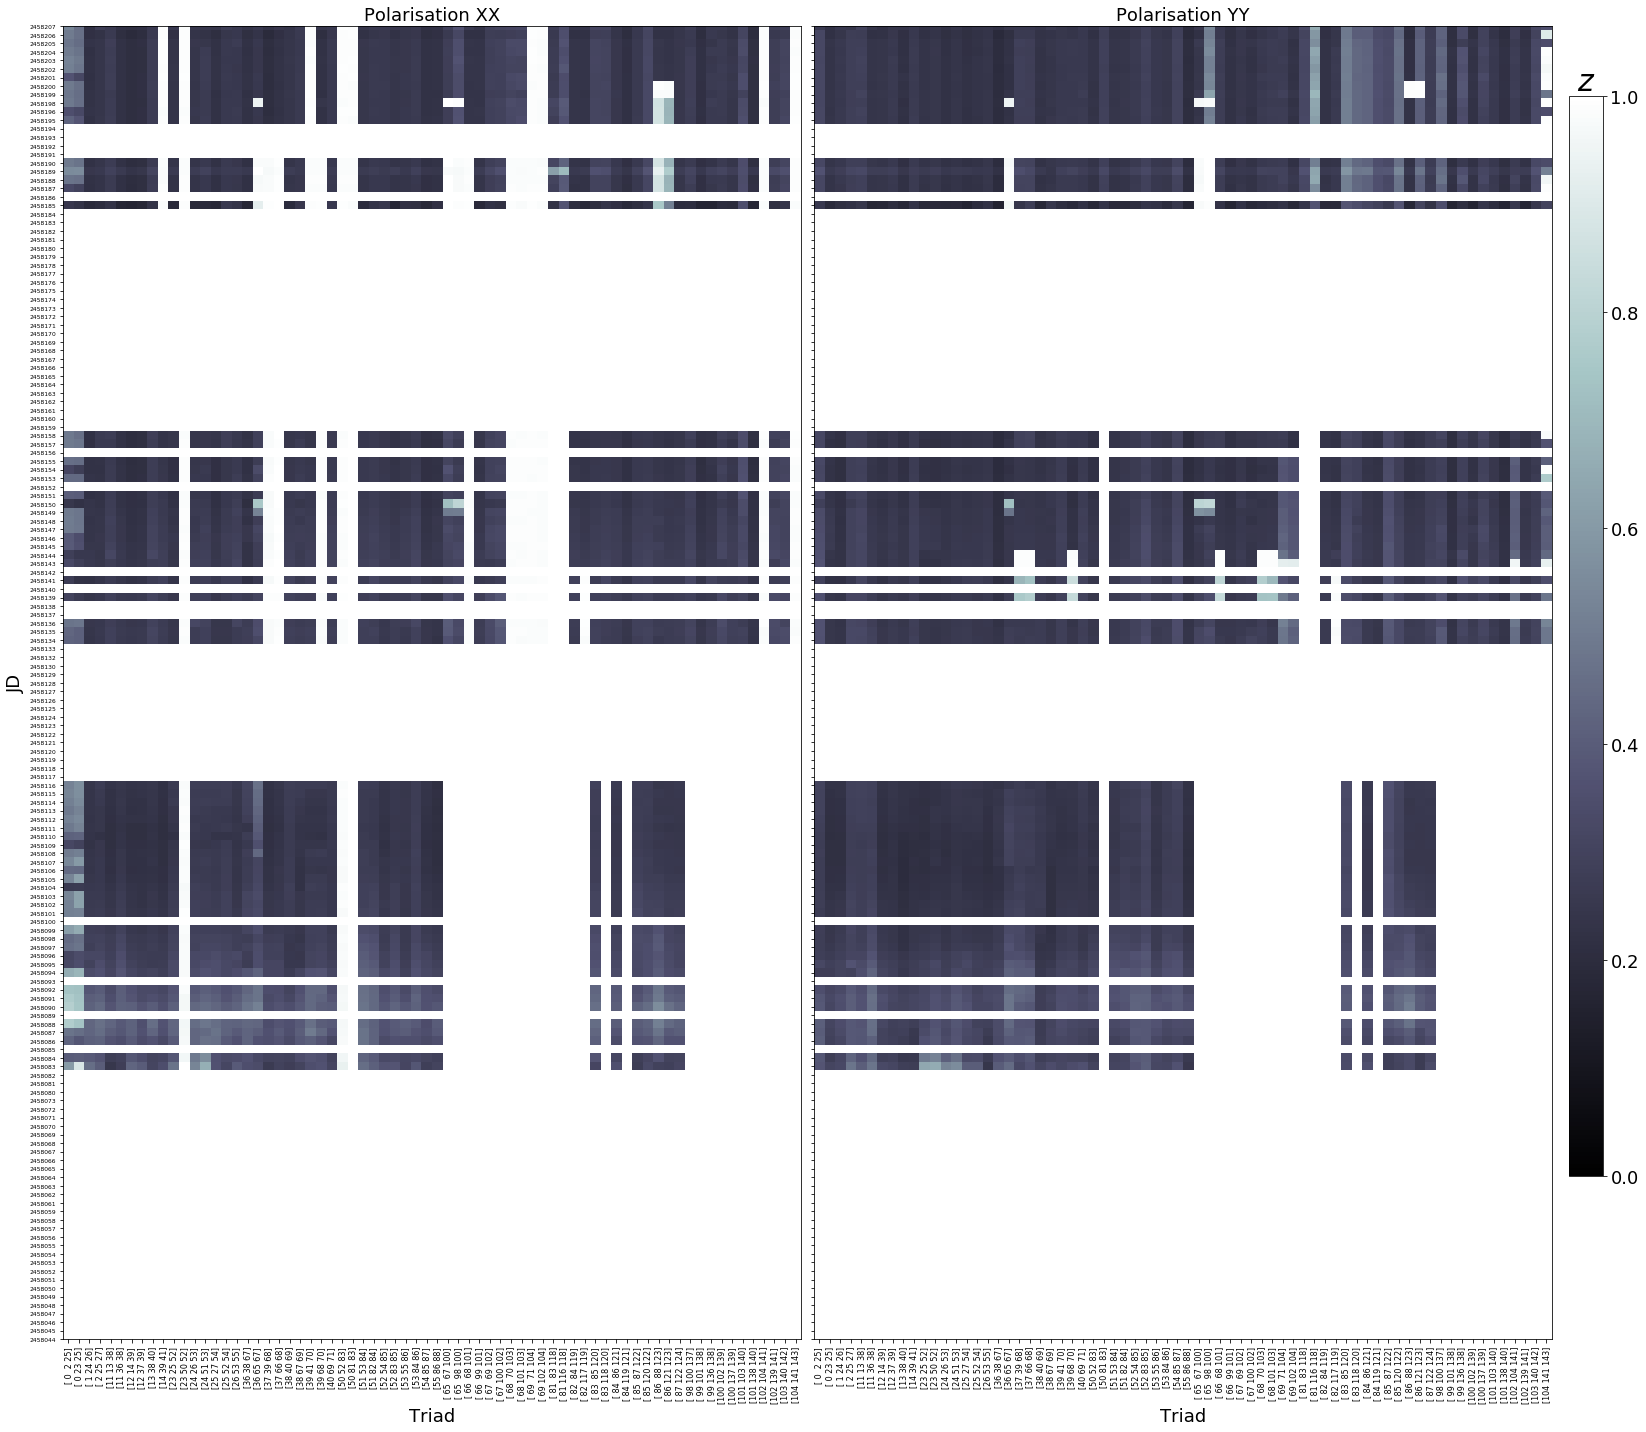

In [31]:
triad_jd_metric(data["EQ28_FE"])

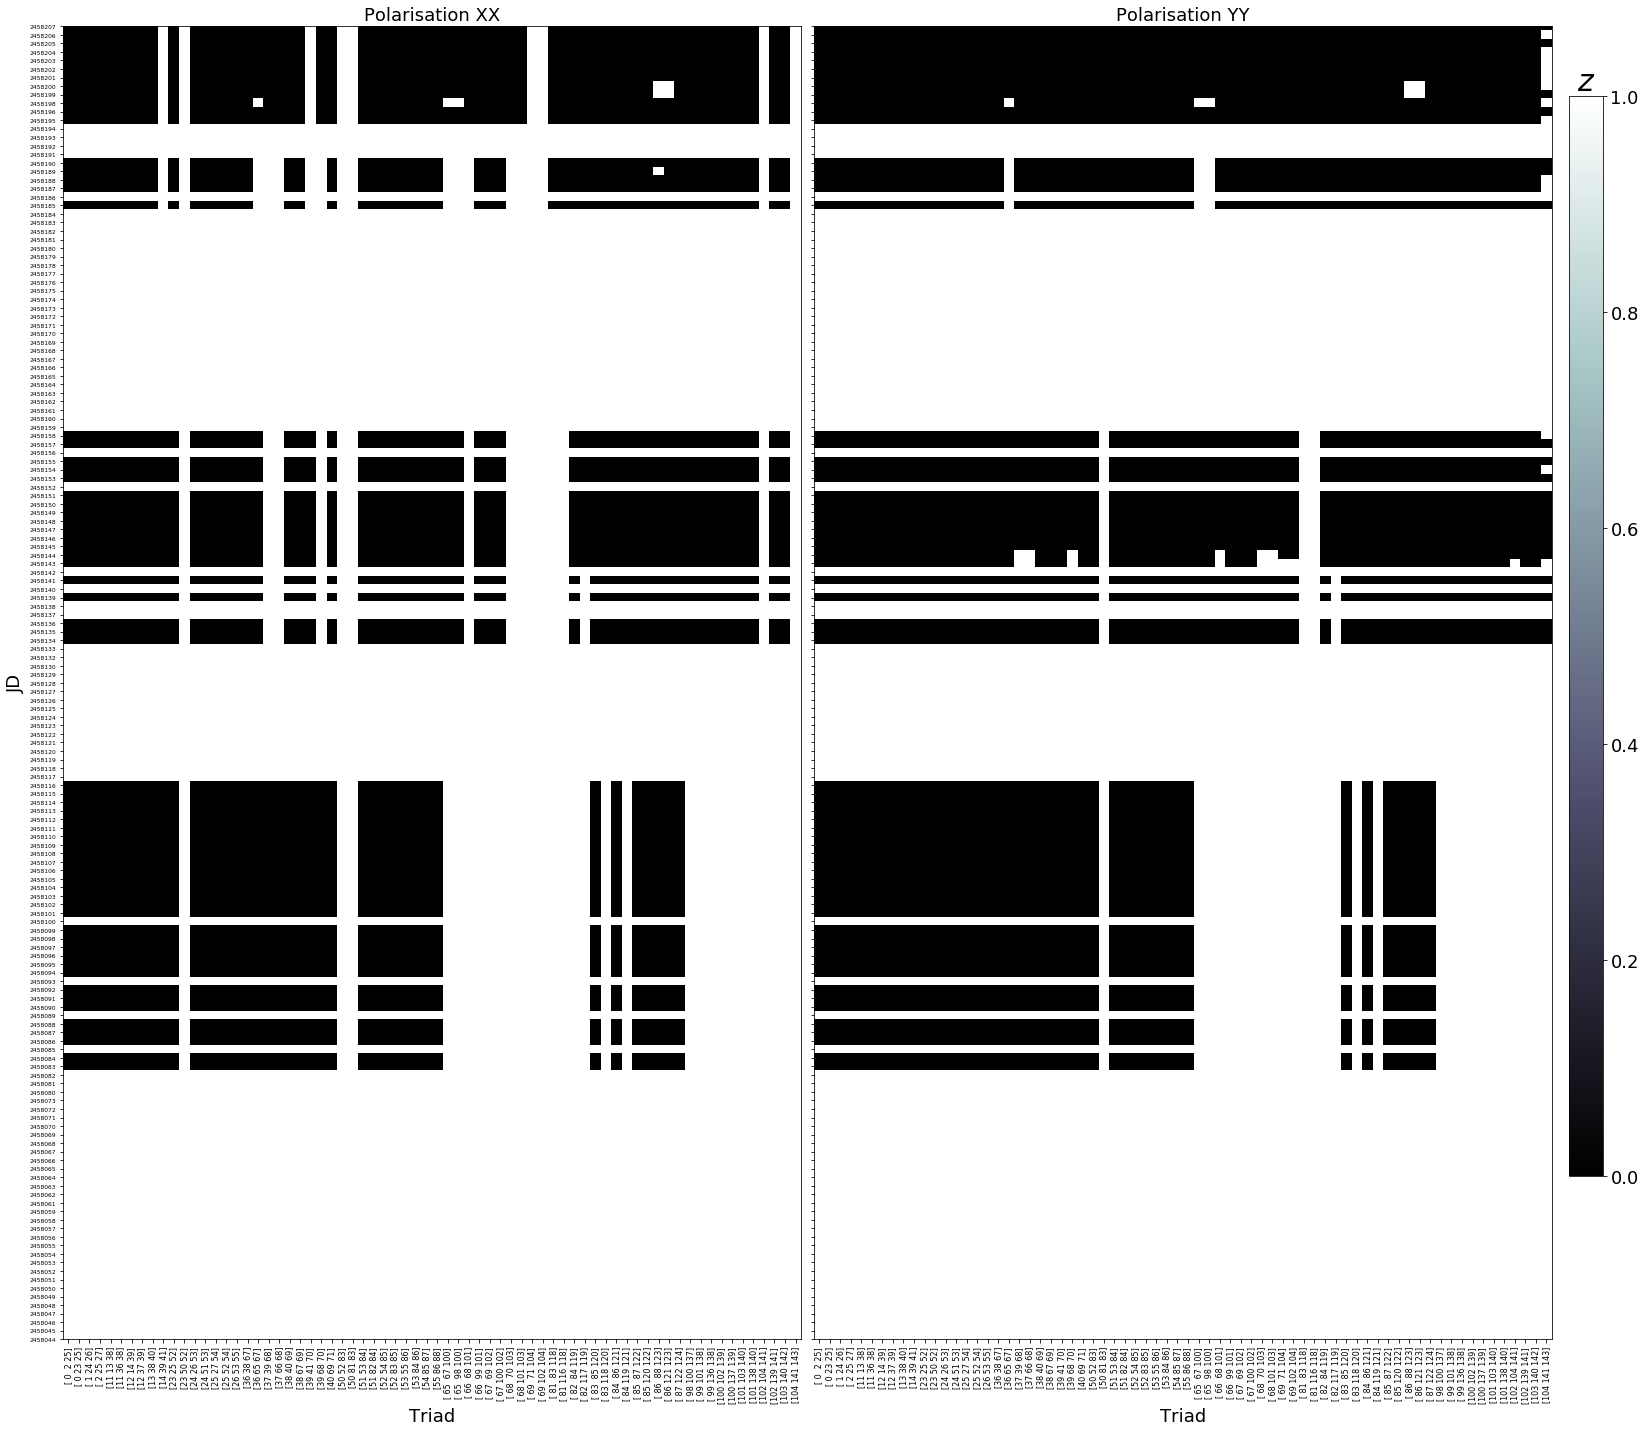

In [32]:
name = "EQ28_FE"
fl = np.zeros_like(data[name]["metric"]).astype(bool)
fl[np.where(data[name]["metric"] > 0.9)] = True
fl[np.isnan(data[name]["metric"])] = True
flags.update({name: fl})
trlist, jd = data[name]["triads"], data[name]["JD"]
plot.triad_jd_metric(fl, trlist, jd);

## Write Flags to File

In [33]:
for fname, trname in product(fnames, trnames):
    name = f"{trname}_F{fname}"
    path = os.path.join(ddir, f"{name}_B2.h5")
    
    f = h5py.File(path, "a")
    if "JD-triad flags" in f.keys():
        del f["JD-triad flags"]
    f.create_dataset("JD-triad flags", data=flags[name].astype(bool))
    f.close()

BlockingIOError: [Errno 11] Unable to open file (unable to lock file, errno = 11, error message = 'Resource temporarily unavailable')